## Nova Risk Modeling: Onyx Data Challenge

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
os.getcwd()

'c:\\Users\\rachi\\OneDrive\\Desktop\\Python Learning\\onyx_sept\\Data_Code'

In [5]:
df = pd.read_excel('Credit_Risk_Dataset_Onyx_Data_September_25.xlsx')

In [6]:
df.head() 

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,...,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,...,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,...,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', 1000)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_ID                   32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
 13  gender                      325

## Data Cleaning

<Axes: >

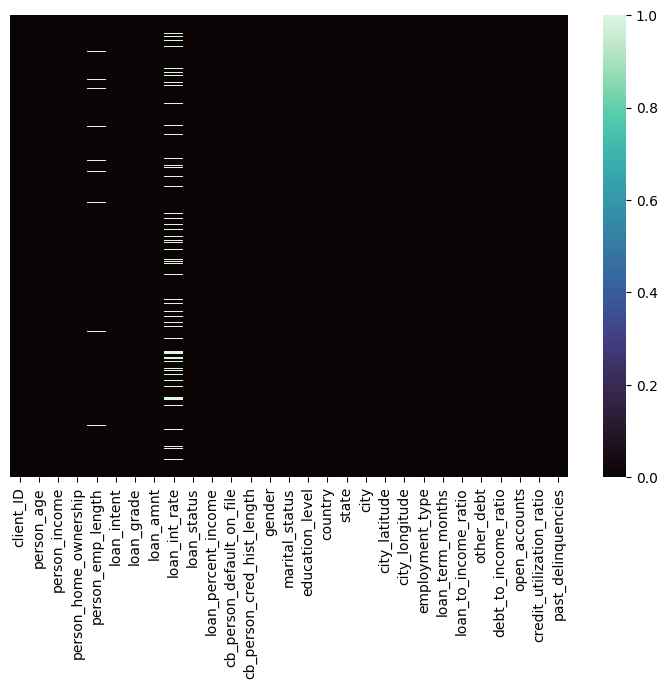

In [9]:
##Null View
plt.figure(figsize = (9,6))
sns.heatmap(df.isnull(), cmap = "mako",yticklabels=False) ##leadership : resume -> internships
##loan_int_rate: has maximum nulls
##person_emp_length: has also missing

In [9]:
df.shape

(32581, 29)

In [10]:
df['loan_int_rate'].isnull().sum(), round((3116/32581)*100,2) 
##9% are null
##person_emp_length: has also missing

(np.int64(3116), 9.56)

In [12]:
df['person_emp_length'].isnull().sum(), round((895/32581)*100,2)
##2% are null

(np.int64(895), 2.75)

In [10]:
df.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [11]:
##to fill loan interest rate
df[df['loan_int_rate'].isnull()]['loan_intent'].value_counts(), df.groupby(['loan_intent'])['loan_int_rate'].mean() 
##interest rate average is more or less same

(loan_intent
 MEDICAL              620
 EDUCATION            599
 VENTURE              566
 DEBTCONSOLIDATION    509
 PERSONAL             507
 HOMEIMPROVEMENT      315
 Name: count, dtype: int64,
 loan_intent
 DEBTCONSOLIDATION    10.983268
 EDUCATION            10.950261
 HOMEIMPROVEMENT      11.201152
 MEDICAL              11.060194
 PERSONAL             10.998221
 VENTURE              10.948275
 Name: loan_int_rate, dtype: float64)

In [12]:
df[df['loan_int_rate'].isnull()]['loan_grade'].value_counts(),
df.groupby(['loan_grade'])['loan_int_rate'].mean() ##this shows actual difference

loan_grade
A     7.327651
B    10.995555
C    13.463542
D    15.361448
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [13]:
df[df['loan_int_rate'].isnull()]['education_level'].value_counts()
df.groupby(['education_level'])['loan_int_rate'].mean() ##is same

education_level
Bachelor       10.985685
High School    11.015172
Master         11.034244
PhD            11.081151
Name: loan_int_rate, dtype: float64

In [14]:
df[df['loan_int_rate'].isnull()]['cb_person_default_on_file'].value_counts()
df.groupby(['cb_person_default_on_file'])['loan_int_rate'].mean()

cb_person_default_on_file
N    10.258913
Y    14.513800
Name: loan_int_rate, dtype: float64

In [15]:
df[df['loan_int_rate'].isnull()]['employment_type'].value_counts()
df.groupby(['employment_type'])['loan_int_rate'].mean() ##more or less same

employment_type
Full-time        11.001867
Part-time        10.993893
Self-employed    11.028941
Unemployed       11.143910
Name: loan_int_rate, dtype: float64

In [8]:
df.groupby(['loan_grade']).agg( {'loan_int_rate':['mean','median']} )
##more less same, normal distribution 

df_int_rate = df.groupby(['loan_grade'],as_index = False).agg( {'loan_int_rate':'mean'} )

df_int_rate


,loan_grade,loan_int_rate
0,A,7.327651
1,B,10.995555
2,C,13.463542
3,D,15.361448
4,E,17.009455
5,F,18.609159
6,G,20.251525


In [17]:
df[df['loan_int_rate'].isnull()].head()
# df.at[39,'loan_int_rate'].isnan()
np.isnan(df.at[39,'loan_int_rate'])
np.isnan(df.at[3,'loan_int_rate'])

np.False_

In [9]:
##Creating function to fill Null values
def func_int_rate(df):
    if np.isnan(df['loan_int_rate']):
        return float((df_int_rate.loc[df_int_rate['loan_grade'] == df['loan_grade'],['loan_int_rate']])['loan_int_rate'].reset_index(drop=True)[0])
    else: 
        return df['loan_int_rate']

In [10]:
df1 = df.copy()
df1['loan_int_rate'] = df.apply(lambda x:func_int_rate(x), axis = 1 )

In [13]:
df[df['loan_int_rate'].isnull()]
df1[df['loan_int_rate'].isnull()].head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
39,CUST_00040,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,15.361448,1,0.42,N,4,Male,Married,High School,USA,New York,Buffalo,42.8864,-78.8784,Self-employed,60,0.419580,10969.320424,0.572997,3,0.633212,1
50,CUST_00051,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,15.361448,1,0.38,Y,4,Female,Single,Master,USA,Texas,Houston,29.7604,-95.3698,Full-time,24,0.384615,12106.049039,0.539821,7,0.523438,0
57,CUST_00058,23,277000,OWN,3.0,PERSONAL,A,35000,7.327651,0,0.13,N,4,Male,Single,Bachelor,USA,New York,New York City,40.7128,-74.0060,Full-time,36,0.126354,73129.330642,0.390359,4,0.454316,0
59,CUST_00060,24,12000,OWN,2.0,VENTURE,E,1750,17.009455,0,0.15,Y,3,Male,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Self-employed,36,0.145833,2467.213396,0.351434,1,0.647044,1
62,CUST_00063,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,10.995555,1,0.04,N,4,Female,Single,Bachelor,UK,England,London,51.5074,-0.1278,Full-time,60,0.038023,63598.548710,0.279842,13,0.944370,0


<Axes: xlabel='person_emp_length', ylabel='Count'>

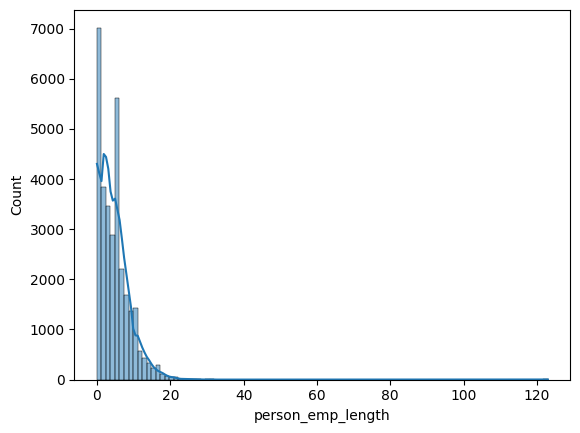

In [21]:
sns.histplot(df1,x= 'person_emp_length',kde= True, bins= 100) ##Right skewed
# df1.groupby(['loan_intent']).agg({'person_emp_length':['mean','median']})

In [22]:
df1.groupby(['gender']).agg({'person_emp_length':['mean','median']})
df1.groupby(['marital_status']).agg({'person_emp_length':['mean','median']})
df1.groupby(['education_level']).agg({'person_emp_length':['mean','median']})
df1.groupby(['employment_type']).agg({'person_emp_length':['mean','median']})
	# marital_status 

person_emp_length       
                             mean median
employment_type                         
Full-time                4.785624    4.0
Part-time                4.768173    4.0
Self-employed            4.854667    4.0
Unemployed               4.729664    4.0

In [23]:
df1.groupby(['person_emp_length'])['person_emp_length'].value_counts(), 
df1['person_emp_length'].nunique()
# .isnull().sum() ##there 

36

In [11]:
##Can't see any relation with any number or any other variable
##Replacing with median as it is skewed distributon

df1['person_emp_length'] = df1['person_emp_length'].fillna(int(df1['person_emp_length'].median()))

In [12]:
df1[df1['person_emp_length'].isnull()]

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies


<Axes: >

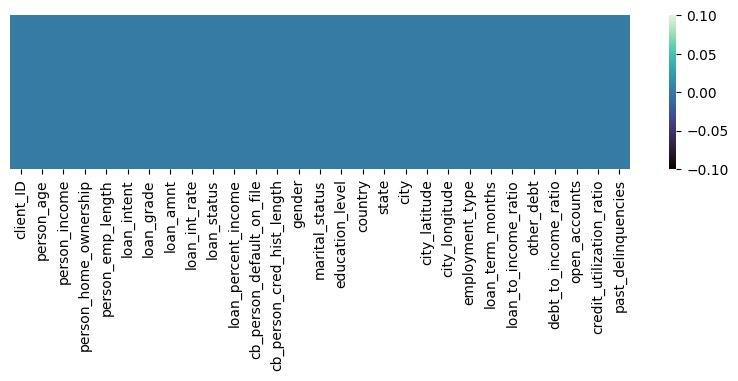

In [13]:
##Null View
plt.figure(figsize = (10,2))
sns.heatmap(df1.isnull(), cmap = "mako",yticklabels=False) ##non-null

## EDA

In [27]:
df1.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


,person_home_ownership,count_x,loan_status,count_y,ration
0,RENT,16446,0,11254,68.430013
1,RENT,16446,1,5192,31.569987
2,MORTGAGE,13444,0,11754,87.429337
3,MORTGAGE,13444,1,1690,12.570663
4,OWN,2584,0,2391,92.530960
5,OWN,2584,1,193,7.469040
6,OTHER,107,0,74,69.158879
7,OTHER,107,1,33,30.841121


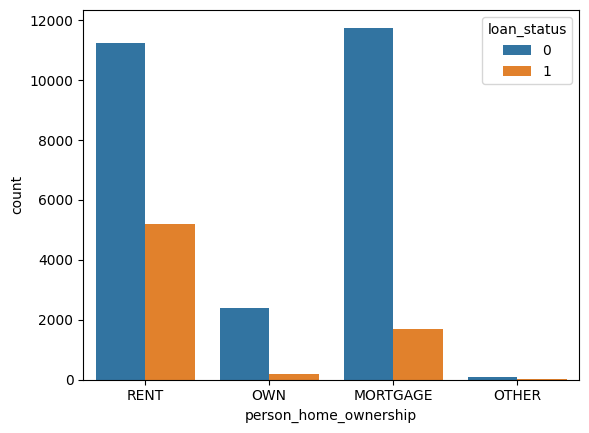

In [28]:
plt.clf()
sns.countplot(df1, x = 'person_home_ownership',hue= 'loan_status')
##Rent people are more defaulting on loan
##Other is Very small percent can be create to one category

df_home = pd.merge(pd.DataFrame(df1['person_home_ownership'].value_counts()).reset_index(),\
                  pd.DataFrame(df1[['person_home_ownership','loan_status']].value_counts()).reset_index(),how = 'inner',on  = 'person_home_ownership'  )
df_home['ration'] = (df_home['count_y']/df_home['count_x'])*100
df_home

<Axes: xlabel='person_home_ownership', ylabel='ration'>

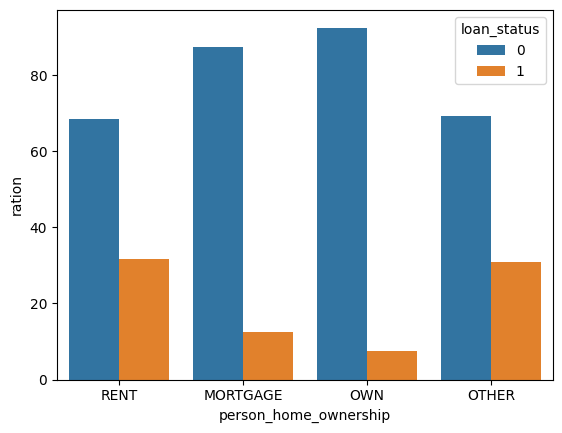

In [29]:
sns.barplot(df_home, x = 'person_home_ownership', y = 'ration',hue= 'loan_status')

In [30]:
df1['person_home_ownership'] = df1['person_home_ownership'].apply(lambda x:'OWN_OTHER' if x in ['OWN', 'OTHER'] else x)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'PERSONAL'),
  Text(1, 0, 'EDUCATION'),
  Text(2, 0, 'MEDICAL'),
  Text(3, 0, 'VENTURE'),
  Text(4, 0, 'HOMEIMPROVEMENT'),
  Text(5, 0, 'DEBTCONSOLIDATION')])

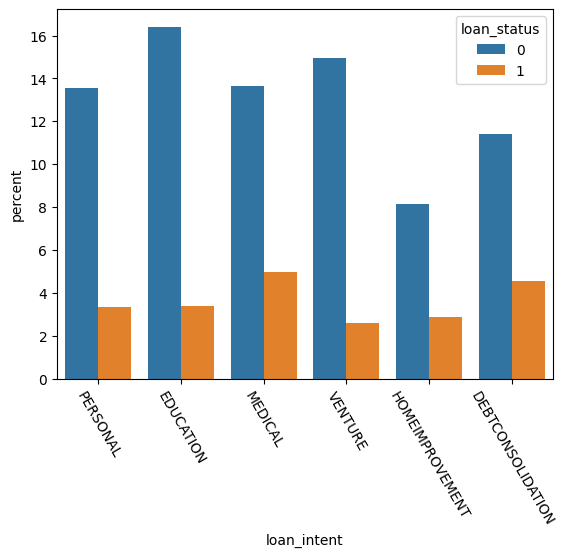

In [31]:
plt.clf()
sns.countplot(df1, x = 'loan_intent',hue= 'loan_status',stat = 'percent')
plt.xticks(rotation = 300)
##Rent people are more defaulting on loan
##Other is Very small percent can be create to one category
##Debt Consolidation, Medical

<Axes: xlabel='loan_grade', ylabel='percent'>

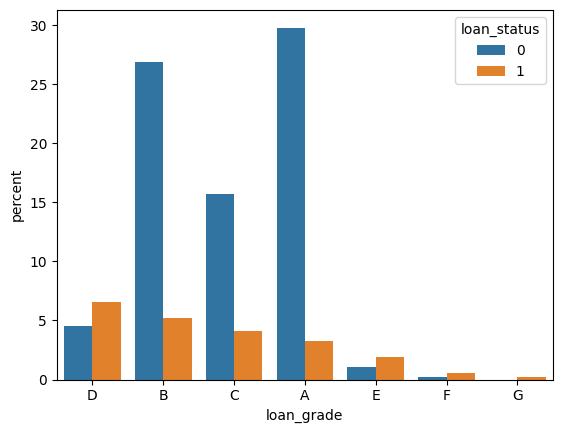

In [32]:
plt.clf()
sns.countplot(df1, x = 'loan_grade',hue= 'loan_status',stat = 'percent')
##clearly can see that as grade increases default number increases, use Ordinal Encoding

<Axes: xlabel='cb_person_default_on_file', ylabel='percent'>

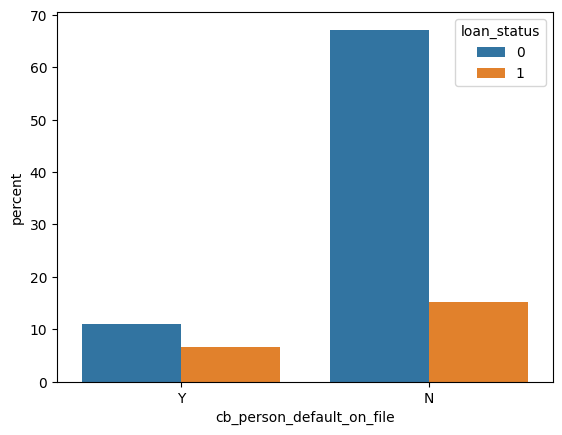

In [33]:
plt.clf()
sns.countplot(df1, x = 'cb_person_default_on_file',hue= 'loan_status',stat = 'percent')
##person who defaulted on afile, they are defaulting more likely

<Axes: xlabel='gender', ylabel='percent'>

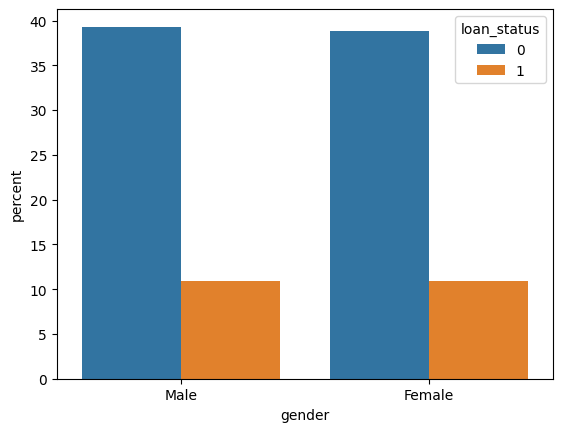

In [34]:
plt.clf()
sns.countplot(df1, x = 'gender',hue= 'loan_status',stat = 'percent')
##Gender is not 

<Axes: xlabel='marital_status', ylabel='percent'>

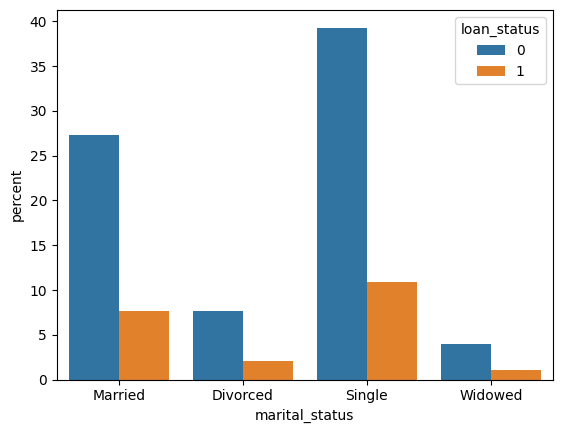

In [35]:
plt.clf()
sns.countplot(df1, x = 'marital_status',hue= 'loan_status',stat = 'percent')
##single people have more chances of defaulting

<Axes: xlabel='education_level', ylabel='percent'>

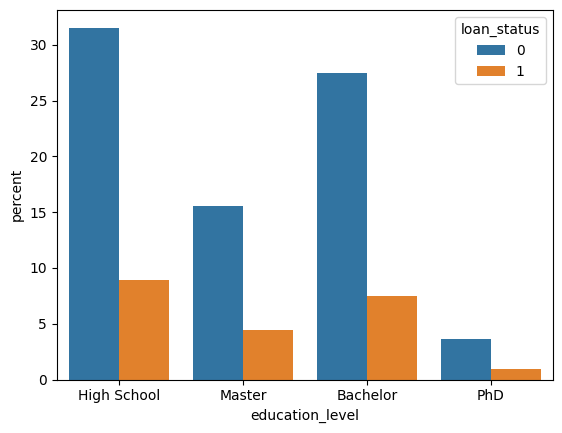

In [36]:
plt.clf()
sns.countplot(df1, x = 'education_level',hue= 'loan_status',stat = 'percent')
##single people have more chances of defaulting
##Ordinal Encoding be used here as well: as high schools are more defaulting than Masters & Phds

<Axes: xlabel='loan_term_months', ylabel='percent'>

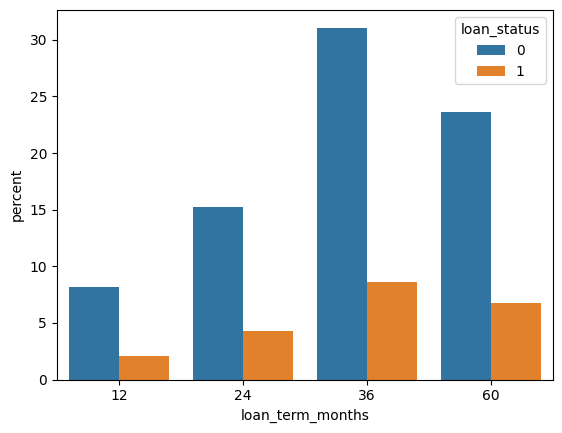

In [37]:
sns.countplot(df1, x = 'loan_term_months',hue= 'loan_status',stat = 'percent')

<Axes: xlabel='loan_term_months', ylabel='ration'>

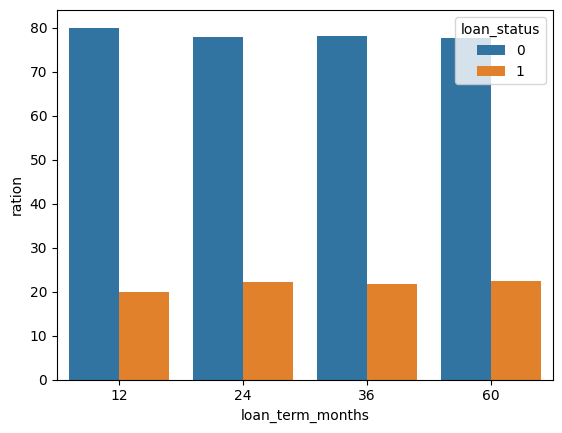

In [38]:
df_loan = pd.merge(pd.DataFrame(df1['loan_term_months'].value_counts()).reset_index(),\
                  pd.DataFrame(df1[['loan_term_months','loan_status']].value_counts()).reset_index(),how = 'inner',on  = 'loan_term_months'  )
df_loan['ration'] = (df_loan['count_y']/df_loan['count_x'])*100
df_loan
sns.barplot(df_loan, x = 'loan_term_months', y = 'ration',hue= 'loan_status')

<Axes: xlabel='country', ylabel='percent'>

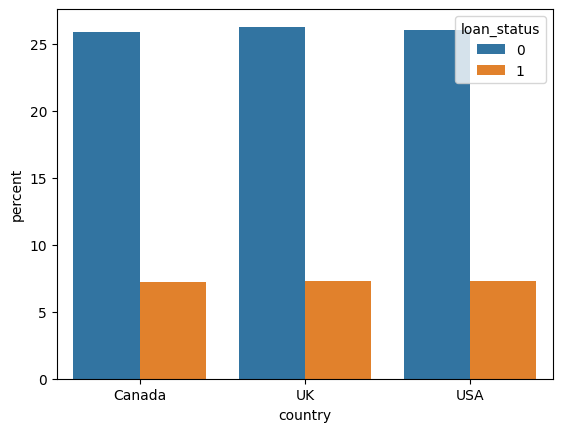

In [39]:
plt.clf()
sns.countplot(df1, x = 'country',hue= 'loan_status',stat = 'percent')
##Country Wise defaults are more or less same

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Ontario'),
  Text(1, 0, 'Wales'),
  Text(2, 0, 'BC'),
  Text(3, 0, 'New York'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Quebec'),
  Text(6, 0, 'Texas'),
  Text(7, 0, 'Scotland'),
  Text(8, 0, 'England')])

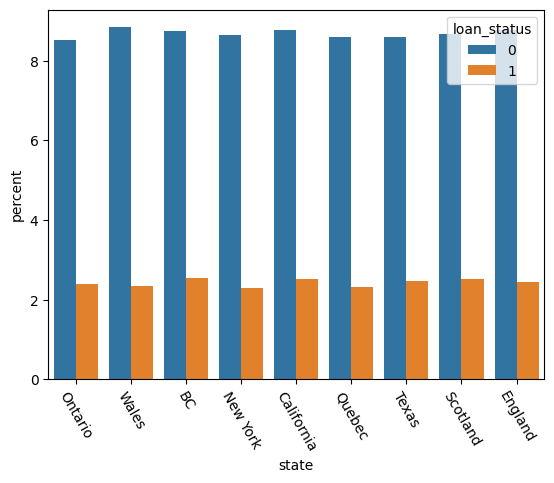

In [40]:
plt.clf()
sns.countplot(df1, x = 'state',hue= 'loan_status',stat = 'percent')
plt.xticks(rotation = 300)
##States have similar defaults

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Toronto'),
  Text(1, 0, 'Swansea'),
  Text(2, 0, 'Vancouver'),
  Text(3, 0, 'Buffalo'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'Quebec City'),
  Text(6, 0, 'Dallas'),
  Text(7, 0, 'Glasgow'),
  Text(8, 0, 'London'),
  Text(9, 0, 'Montreal'),
  Text(10, 0, 'Victoria'),
  Text(11, 0, 'Los Angeles'),
  Text(12, 0, 'New York City'),
  Text(13, 0, 'Ottawa'),
  Text(14, 0, 'Edinburgh'),
  Text(15, 0, 'Houston'),
  Text(16, 0, 'Manchester'),
  Text(17, 0, 'Cardiff')])

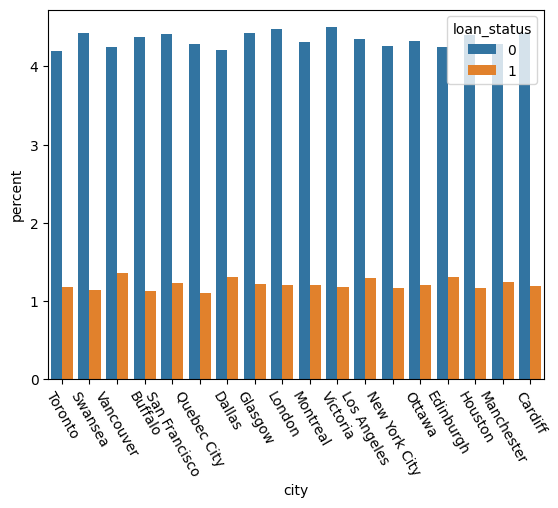

In [41]:
plt.clf()
sns.countplot(df1, x = 'city',hue= 'loan_status',stat = 'percent')
plt.xticks(rotation = 300) 
##more or less defaults are same over city


<Axes: xlabel='employment_type', ylabel='percent'>

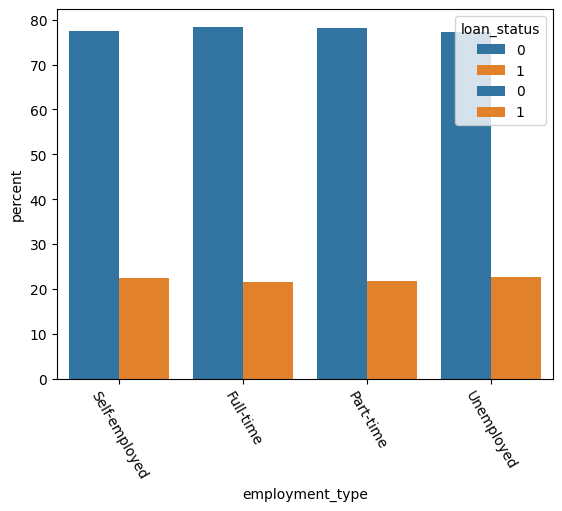

In [42]:
plt.clf()
sns.countplot(df1, x = 'employment_type',hue= 'loan_status',stat = 'percent')
plt.xticks(rotation = 300) 
##more or less defaults are same over city
df1['employment_type'].value_counts(),df1[['employment_type','loan_status']].value_counts()
pd.DataFrame(df1['employment_type'].value_counts()) # = 'employment_type'
pd.DataFrame(df1[['employment_type','loan_status']].value_counts()).reset_index()
df_emp = pd.merge(pd.DataFrame(df1['employment_type'].value_counts()).reset_index(),\
                  pd.DataFrame(df1[['employment_type','loan_status']].value_counts()).reset_index(),how = 'inner',on  = 'employment_type'  )
df_emp['ration'] = (df_emp['count_y']/df_emp['count_x'])*100
df_emp
sns.barplot(df_emp, x = 'employment_type', y = 'ration',hue= 'loan_status')
##It seems same 
# plt.xticks(rotation = 300) 

In [43]:
df1.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN_OTHER,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [44]:
num1 = [i for i in df1.columns if df1[i].dtype != 'O']
num1.remove('city_latitude')
num1.remove('city_longitude')
num1

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_term_months',
 'loan_to_income_ratio',
 'other_debt',
 'debt_to_income_ratio',
 'open_accounts',
 'credit_utilization_ratio',
 'past_delinquencies']

In [17]:
##Numeric
from scipy.stats import pointbiserialr

<Axes: >

<Figure size 640x480 with 0 Axes>

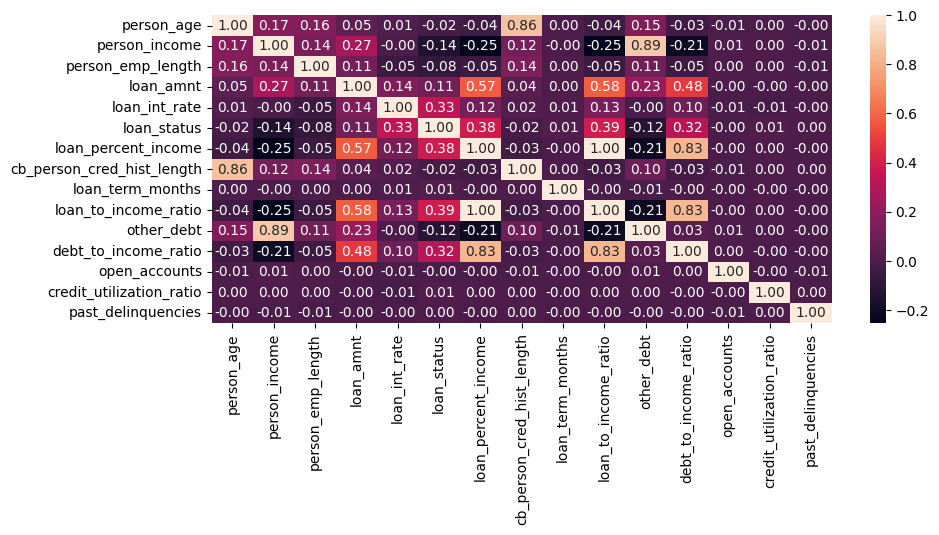

In [46]:
plt.clf()
plt.figure(figsize=(10,4))
sns.heatmap(df1[num1].corr(),annot=True,fmt = ".2f")
#### Highly Correlated:
##debt_to_income ratio and loan_percent_income
## cb_person_cred_hist_length and age 
## person_income and other_debt 

##Over .5
##loan_amount and loan_to_income_ratio 
##loan_amount and loan_percent_income

In [47]:
##Correlation with Target Variable
df1[num1].head(5)

for i in df1[num1].loc[:, ~df1[num1].columns.isin(['loan_status'])].columns:
    r, p = pointbiserialr(df1[i],df1['loan_status'] )

    if p>.05: 
        ##fail to reject Null, Ho:r = 0 
        ###Implies Insig
        print(f"The correlation of Target Variable with {i} is {round(r,2)}, but it is INSIGNIFICANT XXX")
    else:
        
        print(f"The correlation of Target Variable with {i} is {round(r,2)}")

The correlation of Target Variable with person_age is -0.02
The correlation of Target Variable with person_income is -0.14
The correlation of Target Variable with person_emp_length is -0.08
The correlation of Target Variable with loan_amnt is 0.11
The correlation of Target Variable with loan_int_rate is 0.33
The correlation of Target Variable with loan_percent_income is 0.38
The correlation of Target Variable with cb_person_cred_hist_length is -0.02
The correlation of Target Variable with loan_term_months is 0.01
The correlation of Target Variable with loan_to_income_ratio is 0.39
The correlation of Target Variable with other_debt is -0.12
The correlation of Target Variable with debt_to_income_ratio is 0.32
The correlation of Target Variable with open_accounts is -0.0, but it is INSIGNIFICANT XXX
The correlation of Target Variable with credit_utilization_ratio is 0.01, but it is INSIGNIFICANT XXX
The correlation of Target Variable with past_delinquencies is 0.0, but it is INSIGNIFICANT

<Figure size 640x480 with 0 Axes>

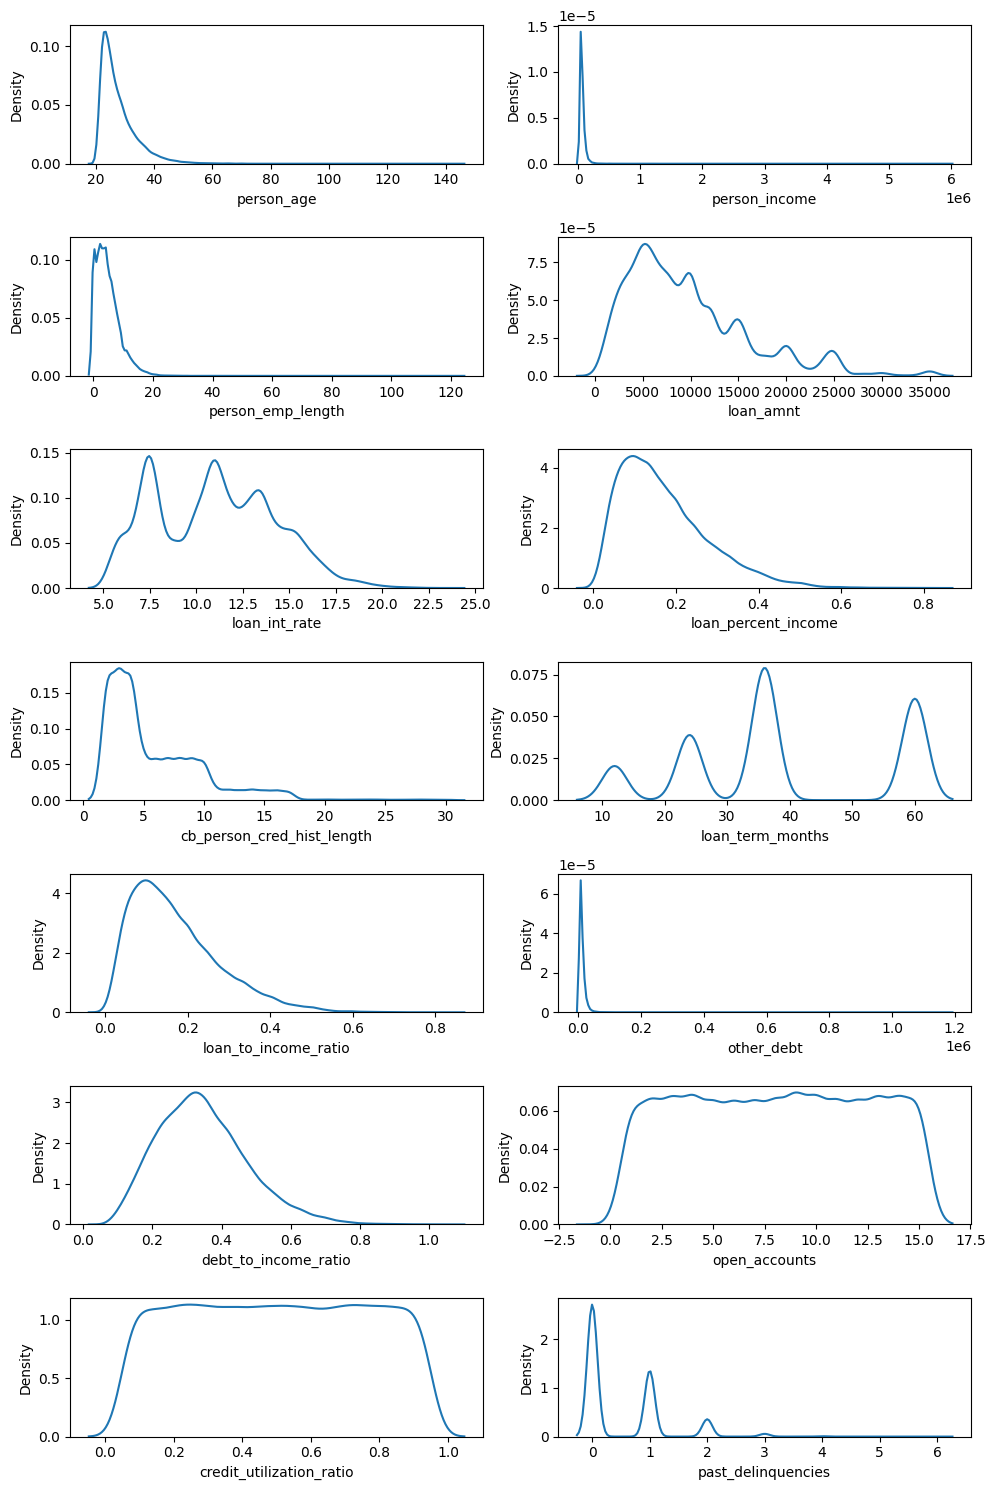

In [48]:
##Density Plot for all the variables
plt.clf()
plt.figure(figsize=(10,15))
for i,j in enumerate(df1[num1].loc[:, ~df1[num1].columns.isin(['loan_status'])].columns):
    plt.subplot(7,2,i+1)
    plt.xlabel(j)
    sns.kdeplot(df1[j])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

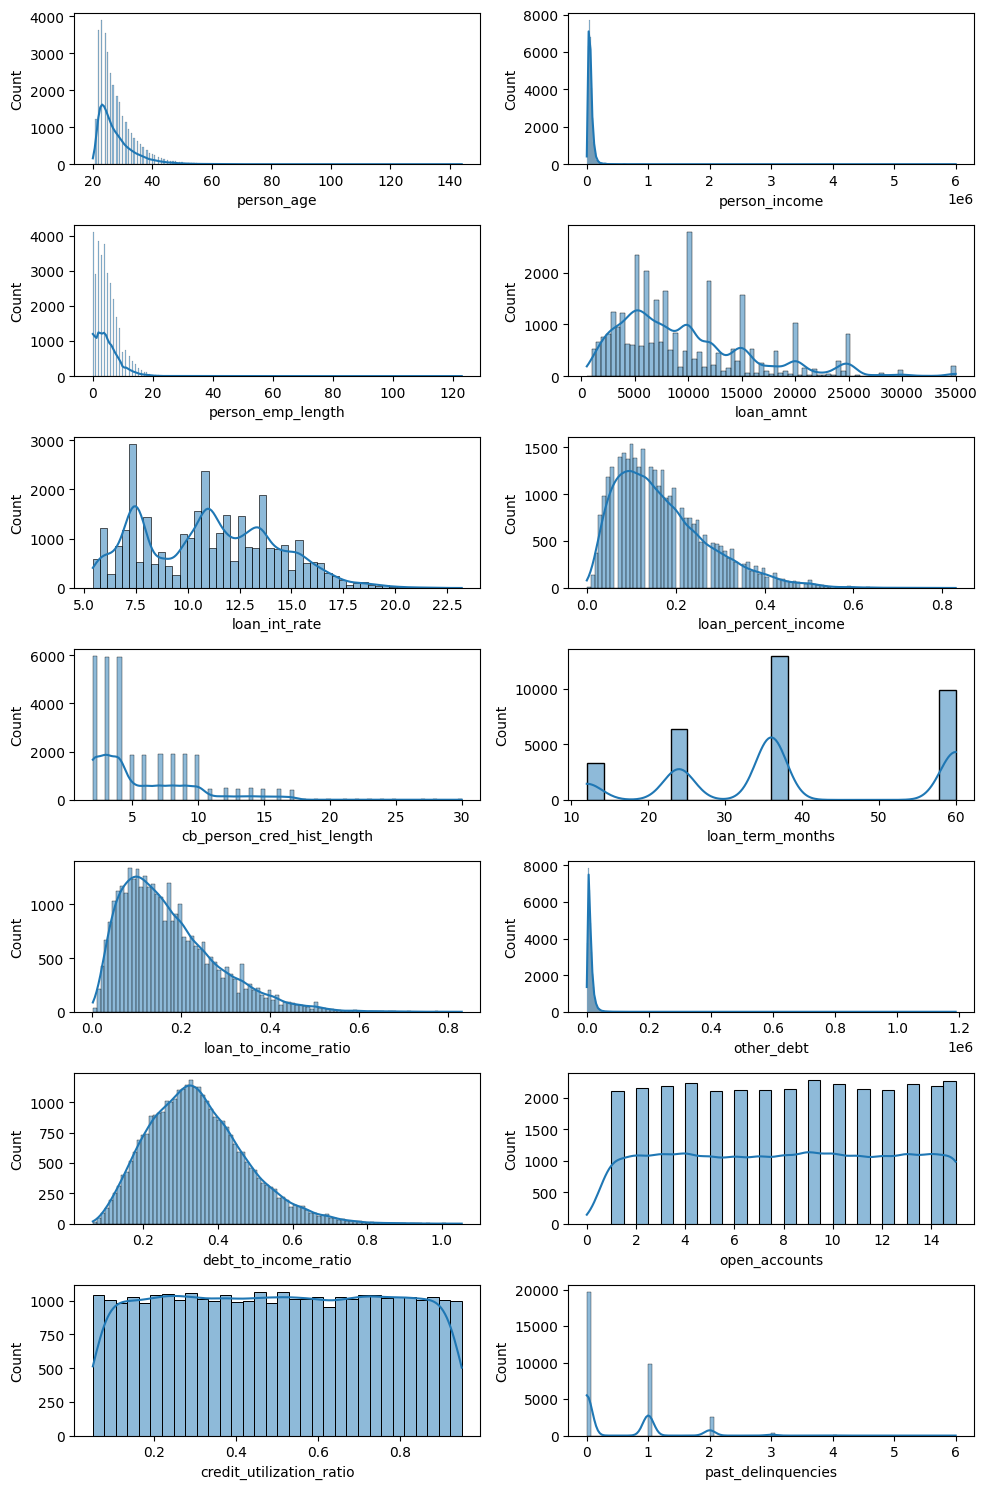

In [49]:
##Hist Plot for all the variables
plt.clf()
plt.figure(figsize=(10,15))
for i,j in enumerate(df1[num1].loc[:, ~df1[num1].columns.isin(['loan_status'])].columns):
    plt.subplot(7,2,i+1)
    plt.xlabel(j)
    # sns.histplot()
    sns.histplot(data=df1, x= df1[j],kde= True)

plt.tight_layout()
plt.show()
##Most Distribution: Is Right skewed 

<Figure size 640x480 with 0 Axes>

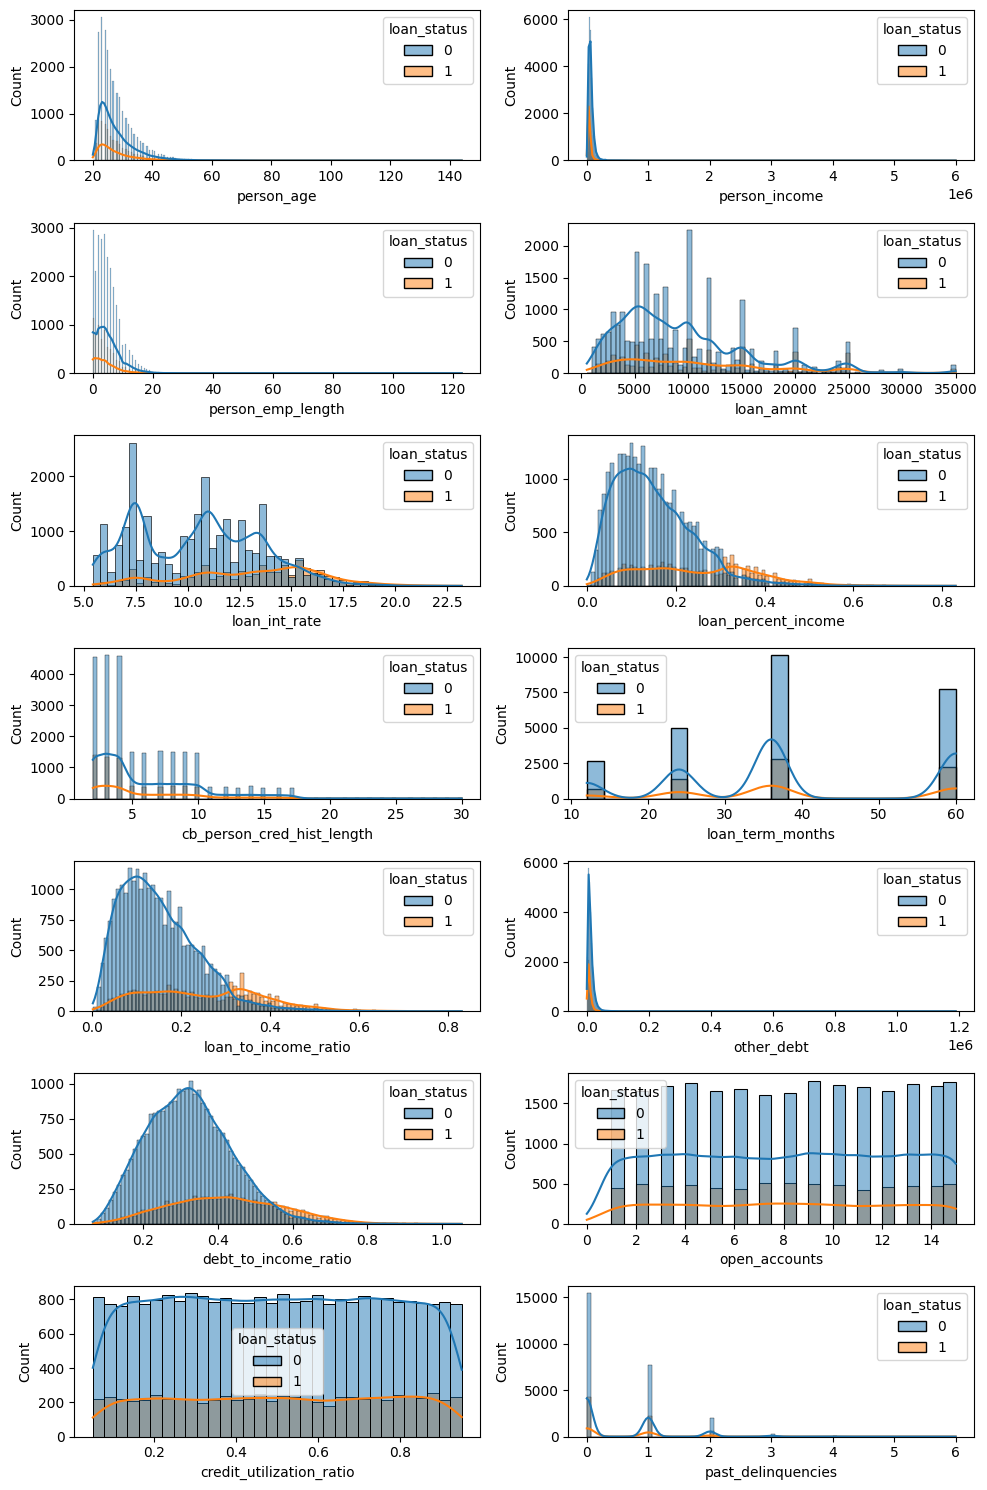

In [50]:
##Density Plot for all the variables
plt.clf()
plt.figure(figsize=(10,15))
for i,j in enumerate(df1[num1].loc[:, ~df1[num1].columns.isin(['loan_status'])].columns):
    plt.subplot(7,2,i+1)
    plt.xlabel(j)
    # sns.histplot()
    sns.histplot(data=df1, x= df1[j],hue= 'loan_status',kde= True)

plt.tight_layout()
plt.show()

#### Observations:
##person_age, person_income, person_emp_length for loan default is same & it is RIGHT SKEWED
###loan_amount, loan_int_rate for default is plateau, for non-default right skewed
###loan_percent_income, loan_to_income_ratio for non-default right skewed

## Data Split

In [14]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
df1.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [16]:
df1['cb_person_default_on_file'].value_counts(),df1['loan_status'].value_counts()

(cb_person_default_on_file
 N    26836
 Y     5745
 Name: count, dtype: int64,
 loan_status
 0    25473
 1     7108
 Name: count, dtype: int64)

In [17]:
## As per EDA Dropping loation related variable since it doesn't seem to impacting target variable much
# X= df.loc[:,~df.columns.isin(['client_ID','loan_status','city_latitude','city_longitude','country','state',	'city'])]
X= df1.loc[:,~df1.columns.isin(['client_ID','loan_status','city_latitude','city_longitude'])]
Y= df1.loc[:,df1.columns.isin(['loan_status'])]

In [18]:
##datasplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
12657,25,66300,MORTGAGE,9.0,MEDICAL,A,1700,6.76,0.02,N,4,Female,Married,Master,UK,England,London,Full-time,60,0.025641,11008.630229,0.191684,9,0.419710,1
11611,22,75000,MORTGAGE,6.0,MEDICAL,B,25000,9.25,0.33,N,2,Female,Married,High School,USA,Texas,Dallas,Part-time,36,0.333333,6309.676802,0.417462,12,0.534266,1
18223,31,105400,RENT,2.0,MEDICAL,D,24250,15.31,0.20,N,5,Female,Married,Master,Canada,Ontario,Ottawa,Full-time,36,0.230076,24285.243559,0.460486,13,0.428052,2
24772,35,75000,MORTGAGE,5.0,PERSONAL,B,5000,8.70,0.07,N,9,Male,Married,PhD,Canada,BC,Victoria,Full-time,36,0.066667,20176.823328,0.335691,13,0.613952,1
30770,36,65000,MORTGAGE,6.0,EDUCATION,C,23325,15.27,0.36,Y,14,Male,Single,Bachelor,USA,Texas,Houston,Full-time,36,0.358846,7506.467725,0.474330,15,0.322813,0


In [58]:
X_train[['loan_grade']].value_counts(),X_train['loan_grade'].unique()

(loan_grade
 A             7549
 B             7333
 C             4511
 D             2557
 E              650
 F              160
 G               46
 Name: count, dtype: int64,
 array(['A', 'B', 'D', 'C', 'E', 'F', 'G'], dtype=object))

In [20]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

y_val.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [21]:
##Data Processing

##Categorical variable without any order
person_home_ownership = pd.get_dummies(X_train['person_home_ownership'], drop_first=True, dtype=int)

##loan intent variable without any order
loan_intent = pd.get_dummies(X_train['loan_intent'], drop_first=True, dtype=int)

##in EDA Can see grade Increases the default chances
ln_gr = OrdinalEncoder(categories= [['A', 'B', 'C','D','E','F','G']])
ln_gr.fit_transform(X_train[['loan_grade']])
loan_grade = pd.DataFrame(ln_gr.fit_transform(X_train[['loan_grade']]).ravel(), columns=['loan_grade'])

##cb_person_default_on_file
cb_person_default_on_file = pd.get_dummies(X_train['cb_person_default_on_file'], drop_first=True, dtype=int)

##gender
gender = pd.get_dummies(X_train['gender'], drop_first=True, dtype=int)

##marital_status
marital_status = pd.get_dummies(X_train['marital_status'], drop_first=True, dtype=int)

##educational_level
edn_level = OrdinalEncoder(categories= [['High School', 'Bachelor', 'Master', 'PhD']])
education_level = pd.DataFrame(edn_level.fit_transform(X_train[['education_level']]).ravel(), columns=['education_level'])

###Location variable, although as per EDA, it seems there aren't important	
country = pd.get_dummies(X_train['country'], drop_first=True, dtype=int)
state = pd.get_dummies(X_train['state'], drop_first=True, dtype=int)
city = pd.get_dummies(X_train['city'], drop_first=True, dtype=int)

##loan_term_months
ln_term_mnth = OrdinalEncoder(categories= [[12,24,36,60]])
loan_term = pd.DataFrame(ln_term_mnth.fit_transform(X_train[['loan_term_months']]).ravel(), columns=['loan_term_months'])

##past_delinquencies
past_delinquencies = pd.get_dummies(X_train['past_delinquencies'], drop_first=True, dtype=int)
past_delinquencies.columns = ["past_delinquencies_"+str(i) for i in past_delinquencies.columns]

X_cat = pd.concat([person_home_ownership,loan_intent, loan_grade,cb_person_default_on_file,gender,marital_status,education_level,country,state,city,loan_term,past_delinquencies],axis = 1)
X_cat.head()

,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4,past_delinquencies_5,past_delinquencies_6
0,0,0,0,0,0,1,0,0,0.0,0,0,1,0,0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1.0,0,0,1,0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,3.0,0,0,1,0,0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,1.0,0,1,1,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,2.0,1,1,0,1,0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0


In [22]:
X_train.head()
# loc[:, ~X_train.columns.isin(['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status','education_level','country' ,'state','city','employment_type'])].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,25,66300,MORTGAGE,9.0,MEDICAL,A,1700,6.76,0.02,N,4,Female,Married,Master,UK,England,London,Full-time,60,0.025641,11008.630229,0.191684,9,0.419710,1
1,22,75000,MORTGAGE,6.0,MEDICAL,B,25000,9.25,0.33,N,2,Female,Married,High School,USA,Texas,Dallas,Part-time,36,0.333333,6309.676802,0.417462,12,0.534266,1
2,31,105400,RENT,2.0,MEDICAL,D,24250,15.31,0.20,N,5,Female,Married,Master,Canada,Ontario,Ottawa,Full-time,36,0.230076,24285.243559,0.460486,13,0.428052,2
3,35,75000,MORTGAGE,5.0,PERSONAL,B,5000,8.70,0.07,N,9,Male,Married,PhD,Canada,BC,Victoria,Full-time,36,0.066667,20176.823328,0.335691,13,0.613952,1
4,36,65000,MORTGAGE,6.0,EDUCATION,C,23325,15.27,0.36,Y,14,Male,Single,Bachelor,USA,Texas,Houston,Full-time,36,0.358846,7506.467725,0.474330,15,0.322813,0


In [23]:
###Right Skewed Distribution which can't be zero or negative
# Rule of Thumb
## Box–Cox → use if the variable is continuous, strictly >0, and right-skewed.
## Yeo–Johnson → use if the variable may contain 0 or negative values.
## Log/Log1p → quick alternative for highly skewed positive data.

person_age_T = PowerTransformer(method= 'box-cox',standardize = True)
age_t = person_age_T.fit_transform(X_train[['person_age']]) #.ravel()

person_income_T = PowerTransformer(method= 'box-cox',standardize = True)
inc_t = person_income_T.fit_transform(X_train[['person_income']]) #.ravel()

##as it has zeros so box-cox can't use
person_emp_length_T = PowerTransformer(method=  'yeo-johnson',standardize = True)
emp_length_t = person_emp_length_T.fit_transform(X_train[['person_emp_length']]) #.ravel()

loan_amnt_T = PowerTransformer(method= 'box-cox',standardize = True)
loan_amt_t = loan_amnt_T.fit_transform(X_train[['loan_amnt']]) #.ravel()

loan_int_rate_T = PowerTransformer(method= 'box-cox',standardize = True)
loan_int_t = loan_int_rate_T.fit_transform(X_train[['loan_int_rate']]) #.ravel()

##as it has zeros so box-cox can't use
loan_percent_income_T = PowerTransformer(method=  'yeo-johnson',standardize = True)
loan_income_t =loan_percent_income_T.fit_transform(X_train[['loan_percent_income']]) #.ravel()

cred_history_T = PowerTransformer(method= 'box-cox',standardize = True)
cred_history_t = cred_history_T.fit_transform(X_train[['cb_person_cred_hist_length']]) #.ravel()

##Ratio
loan_to_income_ratio_T = PowerTransformer(method= 'yeo-johnson',standardize = True )
loan_to_income_ratio_t = loan_to_income_ratio_T.fit_transform(X_train[['loan_to_income_ratio']]) #.ravel()

other_debt_T = PowerTransformer(method= 'box-cox',standardize = True )
other_debt_t = other_debt_T.fit_transform(X_train[['other_debt']]) #.ravel()

##Ratio
debt_to_income_ratio_T = PowerTransformer(method= 'yeo-johnson',standardize = True )
debt_to_income_ratio_t = debt_to_income_ratio_T.fit_transform(X_train[['debt_to_income_ratio']]) #.ravel()

open_accounts_T = PowerTransformer(method= 'yeo-johnson',standardize = True )
open_accounts_t = open_accounts_T.fit_transform(X_train[['open_accounts']]) #.ravel()

##Ratio
credit_utilization_ratio_T = PowerTransformer(method= 'yeo-johnson',standardize = True )
credit_utilization_ratio_t = credit_utilization_ratio_T.fit_transform(X_train[['credit_utilization_ratio']]) #.ravel()

merged = np.hstack([age_t,inc_t,emp_length_t,loan_amt_t,loan_int_t, loan_income_t, cred_history_t,loan_to_income_ratio_t,other_debt_t,debt_to_income_ratio_t,open_accounts_t,credit_utilization_ratio_t])
# merged.head()
X_train_num = pd.DataFrame(merged, columns= ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_to_income_ratio','other_debt','debt_to_income_ratio','open_accounts','credit_utilization_ratio'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio
0,-0.286529,0.328675,1.092511,-1.888162,-1.389963,-1.944481,-0.185409,-1.836483,0.298606,-1.283842,0.277941,-0.289511
1,-1.334984,0.544053,0.536056,1.874919,-0.489836,1.424001,-1.469381,1.437892,-0.449461,0.647100,0.907504,0.151755
2,0.887118,1.129844,-0.591027,1.817174,1.292979,0.501657,0.178131,0.754560,1.387280,0.938320,1.108615,-0.257100
3,1.324468,0.544053,0.311529,-0.662725,-0.677234,-1.060372,1.034731,-1.115479,1.129559,0.033909,1.108615,0.454083
4,1.408900,0.293927,0.536056,1.744059,1.282495,1.580421,1.592715,1.570126,-0.217590,1.027897,1.500031,-0.669396


In [24]:
X_train[['loan_int_rate']].isnull().sum()

loan_int_rate    0
dtype: int64

In [25]:
X_train_treat = pd.concat([X_train_num,X_cat], axis = 1)
X_train_treat.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4,past_delinquencies_5,past_delinquencies_6
0,-0.286529,0.328675,1.092511,-1.888162,-1.389963,-1.944481,-0.185409,-1.836483,0.298606,-1.283842,0.277941,-0.289511,0,0,0,0,0,1,0,0,0.0,0,0,1,0,0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,1,0,0,0,0,0
1,-1.334984,0.544053,0.536056,1.874919,-0.489836,1.424001,-1.469381,1.437892,-0.449461,0.647100,0.907504,0.151755,0,0,0,0,0,1,0,0,1.0,0,0,1,0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0,0
2,0.887118,1.129844,-0.591027,1.817174,1.292979,0.501657,0.178131,0.754560,1.387280,0.938320,1.108615,-0.257100,0,0,1,0,0,1,0,0,3.0,0,0,1,0,0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,0,1,0,0,0,0
3,1.324468,0.544053,0.311529,-0.662725,-0.677234,-1.060372,1.034731,-1.115479,1.129559,0.033909,1.108615,0.454083,0,0,0,0,0,0,1,0,1.0,0,1,1,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,1,0,0,0,0,0
4,1.408900,0.293927,0.536056,1.744059,1.282495,1.580421,1.592715,1.570126,-0.217590,1.027897,1.500031,-0.669396,0,0,0,1,0,0,0,0,2.0,1,1,0,1,0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0


In [26]:
X_train_treat.shape
df1.isnull().sum()
X_train_treat.isnull().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
loan_to_income_ratio          0
other_debt                    0
debt_to_income_ratio          0
open_accounts                 0
credit_utilization_ratio      0
OTHER                         0
OWN                           0
RENT                          0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
VENTURE                       0
loan_grade                    0
Y                             0
Male                          0
Married                       0
Single                        0
Widowed                       0
education_level               0
UK                            0
USA                           0
California                    0
England                       0
New York

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [204]:
logistic_mod = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_mod.fit(X_train_treat,y_train)

print("****LOGISTIC REGRESSION: Basic Model (Balanced)|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,logistic_mod.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,logistic_mod.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,logistic_mod.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,logistic_mod.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,logistic_mod.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,logistic_mod.predict(X_train_treat)) *100,2)}")

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****LOGISTIC REGRESSION: Basic Model (Balanced)|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.79      0.86     17860
           1       0.51      0.79      0.62      4946

    accuracy                           0.79     22806
   macro avg       0.72      0.79      0.74     22806
weighted avg       0.84      0.79      0.81     22806

****EVALUATION SCORES****
Accuracy Score: 79.28
Precision: 51.44
Recall/Positivity: 79.22
F1 Score: 62.38
ROC-AUC: 79.26


In [29]:
# param_grid_LR = {
#   'penalty': ['l1', 'l2', 'elasticnet', None] ,
#   'tol': [0.0001,0.005,.05,.5,5,10,100],
#   'C': [0,1,10,100,1000],
#   'class_weight' : ['balanced',{0:1,1:5},{0:1,1:3}] ,
#   'n_jobs': [-1],
#   'l1_ratio': [0,1,0.5,0.7]

# }

param_grid_LR = {
  'penalty': ['l1','l2','elasticnet'],   # drop None
  'solver': ['saga'],                    # supports all penalties
  'C': [0.01,0.1,1,10,100],              # drop 0, keep log scale
  'l1_ratio': [0.5,0.7],                 # only if elasticnet
  'class_weight': ['balanced',{0:1,1:3}]
}


In [ ]:
logistic_mod_B = LogisticRegression(max_iter=1000)
lg_grid = GridSearchCV(logistic_mod_B,param_grid=param_grid_LR,cv =5,scoring='recall')
##FN => Defaulting but predict won't default (REcall) => more cost to it
##FP: Predicted will default, but haven't (Precision)

In [42]:
lg_grid.fit(X_train_treat,y_train)

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': ['balanced', {0: 1, 1: 3}], 'l1_ratio': [0.5, 0.7], 'penalty': ['l1', 'l2', ...], ...}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [44]:
##first atempt
lg_grid.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'l1_ratio': 0.5,
 'penalty': 'l1',
 'solver': 'saga'}

In [157]:
df1.to_csv( 'Clean_Credit.csv', index= False)
# df1.isnull().sum()

In [205]:

print("****LOGISTIC REGRESSION: Tuned Version|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,lg_grid.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,lg_grid.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,lg_grid.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,lg_grid.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,lg_grid.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,lg_grid.predict(X_train_treat)) *100,2)}")

****LOGISTIC REGRESSION: Tuned Version|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.79      0.86     17860
           1       0.51      0.79      0.62      4946

    accuracy                           0.79     22806
   macro avg       0.72      0.79      0.74     22806
weighted avg       0.84      0.79      0.81     22806

****EVALUATION SCORES****
Accuracy Score: 79.19
Precision: 51.32
Recall/Positivity: 78.97
F1 Score: 62.21
ROC-AUC: 79.11


In [35]:
param_grid_LR1 = {
  'penalty': ['l1'],   # drop None
  'solver': ['saga','liblinear'],                    # supports all penalties
  'C': [0.01,0.1,1,10,100],              # drop 0, keep log scale
  'tol':[0.001,0.05,1],
  'class_weight': [{0:1,1:3},'balanced',{0:1,1:5}]
}

In [ ]:

lg_grid1 = GridSearchCV(logistic_mod_B,param_grid=param_grid_LR1,cv =5,scoring='recall')

In [37]:
lg_grid1.fit(X_train_treat,y_train)

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\utils\validation.py

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [{0: 1, 1: 3}, 'balanced', ...], 'penalty': ['l1'], 'solver': ['saga', 'liblinear'], ...}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [46]:
##first atempt
lg_grid1.best_params_

{'C': 0.01,
 'class_weight': {0: 1, 1: 5},
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.05}

In [203]:

print("****LOGISTIC REGRESSION: Tuned Version 1|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,lg_grid1.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,lg_grid1.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,lg_grid1.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,lg_grid1.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,lg_grid1.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,lg_grid1.predict(X_train_treat)) *100,2)}")

****LOGISTIC REGRESSION: Tuned Version 1|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     17860
           1       0.43      0.85      0.57      4946

    accuracy                           0.73     22806
   macro avg       0.69      0.77      0.69     22806
weighted avg       0.83      0.73      0.75     22806

****EVALUATION SCORES****
Accuracy Score: 72.59
Precision: 43.3
Recall/Positivity: 85.16
F1 Score: 57.41
ROC-AUC: 77.14


In [191]:
##Validation Data Adjustment
##Data Processing

##Categorical variable without any order
person_home_ownership_V = pd.get_dummies(X_val['person_home_ownership'], drop_first=True, dtype=int)

##loan intent variable without any order
loan_intent_V = pd.get_dummies(X_val['loan_intent'], drop_first=True, dtype=int)

##in EDA Can see grade Increases the default chances
loan_grade_V = pd.DataFrame(ln_gr.transform(X_val[['loan_grade']]).ravel(), columns=['loan_grade'])

##cb_person_default_on_file
cb_person_default_on_file_V = pd.get_dummies(X_val['cb_person_default_on_file'], drop_first=True, dtype=int)

##gender
gender_V = pd.get_dummies(X_val['gender'], drop_first=True, dtype=int)

##marital_status
marital_status_V = pd.get_dummies(X_val['marital_status'], drop_first=True, dtype=int)

##educational_level
education_level_V = pd.DataFrame(edn_level.transform(X_val[['education_level']]).ravel(), columns=['education_level'])

###Location variable, although as per EDA, it seems there aren't important	
country_V = pd.get_dummies(X_val['country'], drop_first=True, dtype=int)
state_V = pd.get_dummies(X_val['state'], drop_first=True, dtype=int)
city_V = pd.get_dummies(X_val['city'], drop_first=True, dtype=int)

##loan_term_months
loan_term_V = pd.DataFrame(ln_term_mnth.transform(X_val[['loan_term_months']]).ravel(), columns=['loan_term_months'])

##past_delinquencies
past_delinquencies_V = pd.get_dummies(X_val['past_delinquencies'], drop_first=True, dtype=int)
past_delinquencies_V.columns = ["past_delinquencies_"+str(i) for i in past_delinquencies_V.columns]

X_cat_V = pd.concat([person_home_ownership_V,loan_intent_V, loan_grade_V,cb_person_default_on_file_V,gender_V,marital_status_V,education_level_V,country_V,state_V,city_V,loan_term_V,past_delinquencies_V],axis = 1)
X_cat_V.head()

,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4
0,0,0,1,0,0,0,0,0,0.0,0,1,1,0,0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0
1,0,0,0,0,0,0,0,1,3.0,0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,0,0,1,0,1,0,0,0,2.0,1,1,1,0,0,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,1,0,0,0
3,0,0,1,0,0,0,1,0,2.0,0,1,0,1,0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,1,0,0,0
4,0,0,1,0,1,0,0,0,2.0,1,0,1,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,1,0,0,0


In [192]:

age_t_V = person_age_T.transform(X_val[['person_age']]) #.ravel()


inc_t_V = person_income_T.transform(X_val[['person_income']]) #.ravel()

##as it has zeros so box-cox can't use
emp_length_t_V = person_emp_length_T.transform(X_val[['person_emp_length']]) #.ravel()

loan_amt_t_V = loan_amnt_T.transform(X_val[['loan_amnt']]) #.ravel()

loan_int_t_V = loan_int_rate_T.transform(X_val[['loan_int_rate']]) #.ravel()

##as it has zeros so box-cox can't use
loan_income_t_V =loan_percent_income_T.transform(X_val[['loan_percent_income']]) #.ravel()

cred_history_t_V = cred_history_T.transform(X_val[['cb_person_cred_hist_length']]) #.ravel()

##Ratio
loan_to_income_ratio_t_V = loan_to_income_ratio_T.transform(X_val[['loan_to_income_ratio']]) #.ravel()

other_debt_t_V = other_debt_T.transform(X_val[['other_debt']]) #.ravel()

##############################
##Ratio
debt_to_income_ratio_t_V = debt_to_income_ratio_T.transform(X_val[['debt_to_income_ratio']]) #.ravel()

open_accounts_t_V = open_accounts_T.transform(X_val[['open_accounts']]) #.ravel()

##Ratio
credit_utilization_ratio_t_V = credit_utilization_ratio_T.transform(X_val[['credit_utilization_ratio']]) #.ravel()

merged_V = np.hstack([age_t_V,inc_t_V,emp_length_t_V,loan_amt_t_V,loan_int_t_V, loan_income_t_V, cred_history_t_V,loan_to_income_ratio_t_V,other_debt_t_V,debt_to_income_ratio_t_V,open_accounts_t_V,credit_utilization_ratio_t_V])
# merged.head()
X_train_num_V = pd.DataFrame(merged_V, columns= ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_to_income_ratio','other_debt','debt_to_income_ratio','open_accounts','credit_utilization_ratio'])
X_train_num_V.head()

X_treat_V = pd.concat([X_train_num_V,X_cat_V ], axis = 1)
X_treat_V.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4
0,-1.334984,0.840336,0.738183,1.174208,-0.363549,0.409396,-0.185409,0.415843,1.234969,0.772215,-0.169279,1.247596,0,0,1,0,0,0,0,0,0.0,0,1,1,0,0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0
1,0.204909,-1.931588,-0.236646,-2.076781,1.666809,-1.060372,0.458915,-1.017068,-1.370901,-0.840962,1.500031,-0.611043,0,0,0,0,0,0,0,1,3.0,0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,0.407155,0.623304,-0.591027,-0.662725,1.015866,-1.221304,0.458915,-1.163269,1.331156,0.231601,-0.901022,-0.053353,0,0,1,0,1,0,0,0,2.0,1,1,1,0,0,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,1,0,0,0
3,0.407155,-0.243519,0.738183,-0.943015,1.037528,-0.906544,1.174061,-0.859083,-0.076381,-0.642570,-0.169279,0.916068,0,0,1,0,0,0,1,0,2.0,0,1,0,1,0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,1,0,0,0
4,-0.286529,-0.033510,0.738183,0.414807,0.794064,0.501657,-1.469381,0.481817,-1.298901,-0.620930,-0.646916,-0.558949,0,0,1,0,1,0,0,0,2.0,1,0,1,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,1,0,0,0


In [ ]:
# len(X_train_treat_V.columns )

X_train_treat.columns[~X_train_treat.columns.isin(X_treat_V.columns ) ]

Index(['past_delinquencies_5', 'past_delinquencies_6'], dtype='object')

In [193]:
X_treat_V['past_delinquencies_5'] = 0
X_treat_V['past_delinquencies_6'] = 0

In [202]:

print("****LOGISTIC REGRESSION: Basic|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,logistic_mod.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,logistic_mod.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,logistic_mod.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,logistic_mod.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,logistic_mod.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC : {round(metrics.roc_auc_score(y_val,logistic_mod.predict(X_treat_V)) *100,2)}")

****LOGISTIC REGRESSION: Basic|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3815
           1       0.53      0.80      0.64      1072

    accuracy                           0.80      4887
   macro avg       0.73      0.80      0.75      4887
weighted avg       0.85      0.80      0.81      4887

****EVALUATION SCORES****
Accuracy Score: 80.17
Precision: 53.21
Recall/Positivity: 79.66
F1 Score: 63.8
ROC-AUC : 79.99


In [201]:

print("****LOGISTIC REGRESSION: Version 1|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,lg_grid.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,lg_grid.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,lg_grid.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,lg_grid.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,lg_grid.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC : {round(metrics.f1_score(y_val,lg_grid.predict(X_treat_V)) *100,2)}")

****LOGISTIC REGRESSION: Version 1|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3815
           1       0.53      0.80      0.64      1072

    accuracy                           0.80      4887
   macro avg       0.73      0.80      0.75      4887
weighted avg       0.85      0.80      0.81      4887

****EVALUATION SCORES****
Accuracy Score: 80.07
Precision: 53.02
Recall/Positivity: 80.13
F1 Score: 63.82
ROC-AUC : 63.82


In [200]:

print("****LOGISTIC REGRESSION: Version 2|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,lg_grid1.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,lg_grid1.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,lg_grid1.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,lg_grid1.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,lg_grid1.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC : {round(metrics.roc_auc_score(y_val,lg_grid1.predict(X_treat_V)) *100,2)}")

****LOGISTIC REGRESSION: Version 2|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      3815
           1       0.44      0.85      0.58      1072

    accuracy                           0.73      4887
   macro avg       0.69      0.77      0.69      4887
weighted avg       0.83      0.73      0.75      4887

****EVALUATION SCORES****
Accuracy Score: 72.91
Precision: 43.93
Recall/Positivity: 85.07
F1 Score: 57.94
ROC-AUC : 77.28


## Threshold Monitoring

In [90]:
lg_grid1.param_grid

{'penalty': ['l1'],
 'solver': ['saga', 'liblinear'],
 'C': [0.01, 0.1, 1, 10, 100],
 'tol': [0.001, 0.05, 1],
 'class_weight': [{0: 1, 1: 3}, 'balanced', {0: 1, 1: 5}]}

In [96]:
coef_df = pd.DataFrame({
    'feature': X_train_treat.columns,
    'coefficient': lg_grid1.best_estimator_.coef_[0]
})
coef_df[coef_df['coefficient'] != 0]

,feature,coefficient
1,person_income,-0.148739
3,loan_amnt,-0.070891
4,loan_int_rate,0.321989
7,loan_to_income_ratio,0.118441
8,other_debt,-0.563362
9,debt_to_income_ratio,0.743145
11,credit_utilization_ratio,0.015151
13,OWN,-1.395550
14,RENT,0.385151
15,EDUCATION,-0.586999


In [ ]:
lg_grid1.best_estimator_.coef_[0], X_train_treat.columns

array([ 0.        , -0.14873853,  0.        , -0.07089108,  0.32198892,
        0.        ,  0.        ,  0.1184414 , -0.56336164,  0.74314453,
        0.        ,  0.01515062,  0.        , -1.39554952,  0.38515132,
       -0.58699889,  0.01064262, -0.07839462, -0.30294006, -0.87393913,
        0.52171518,  0.        ,  0.        , -0.06137771, -0.09166112,
        0.        , -0.00913518, -0.01842828, -0.0637172 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.0551104 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [60]:
y_prob = lg_grid1.predict_proba(X_train_treat)[:,1]
precision, recall, pr_thresholds = metrics.precision_recall_curve(y_train, y_prob)


In [89]:
pr_auc = metrics.average_precision_score(y_train, y_prob)
pr_auc, metrics.roc_auc_score(y_train, y_prob)

(0.6885998784107181, 0.8625269144158932)

In [69]:
df_train_pr_re = pd.concat([pd.DataFrame(data=precision,columns=["precision"]),pd.DataFrame(data=recall,columns=["recall"])
           ,pd.DataFrame(data=pr_thresholds,columns=["threshold"])
           ],axis=1)
df_train_pr_re.tail()

,precision,recall,threshold
22802,1.0,0.000809,0.995393
22803,1.0,0.000607,0.995965
22804,1.0,0.000404,0.996363
22805,1.0,0.000202,0.996664
22806,1.0,0.000000,NaN


Text(0, 0.5, 'precision')

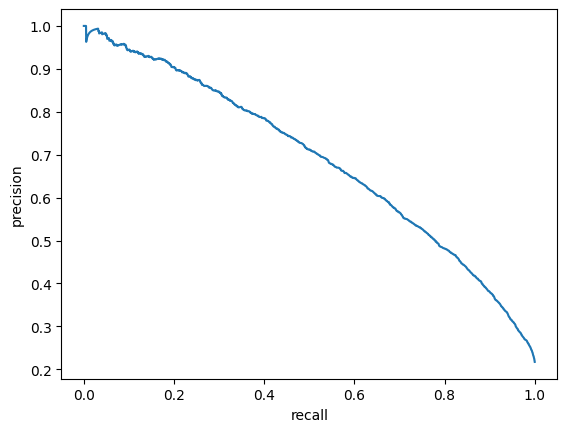

In [ ]:
sns.lineplot(data=df_train_pr_re, y=precision, x = recall,)
plt.xlabel('recall')
plt.ylabel('precision')

In [73]:
f1 = 2 * (precision * recall) / (precision + recall + 1e-12)
best_idx = np.argmax(f1)
best_threshold = pr_thresholds[best_idx]
print("Best threshold:", best_threshold,
      "Precision:", precision[best_idx], "Recall:", recall[best_idx])

Best threshold: 0.7113871566119184 Precision: 0.5976095617529881 Recall: 0.6672058228871816


In [74]:
step = 1000  # keep every 100th threshold
precision_sub = precision[::step]
recall_sub = recall[::step]
pr_thresholds_sub = pr_thresholds[::step]

In [84]:
df_train_pr_re_sub = pd.concat([pd.DataFrame(data=precision_sub,columns=["precision"]),pd.DataFrame(data=recall_sub,columns=["recall"])
           ,pd.DataFrame(data=pr_thresholds_sub,columns=["threshold"])
           ],axis=1)
df_train_pr_re_sub.tail()
df_train_pr_re_sub['f1'] = 2 * (df_train_pr_re_sub['precision'] * df_train_pr_re_sub['recall']) / (df_train_pr_re_sub['precision'] + df_train_pr_re_sub['recall'] + 1e-12)
df_train_pr_re_sub.head()

,precision,recall,threshold,f1
0,0.216873,1.000000,0.001217,0.356443
1,0.226451,0.998383,0.052308,0.369169
2,0.236663,0.995552,0.082991,0.382417
3,0.247602,0.991508,0.112035,0.396251
4,0.259492,0.986656,0.141601,0.410913


In [80]:
df_train_pr_re_sub.head()

,precision,recall,threshold
0,0.216873,1.000000,0.001217
1,0.226451,0.998383,0.052308
2,0.236663,0.995552,0.082991
3,0.247602,0.991508,0.112035
4,0.259492,0.986656,0.141601


<Figure size 640x480 with 0 Axes>

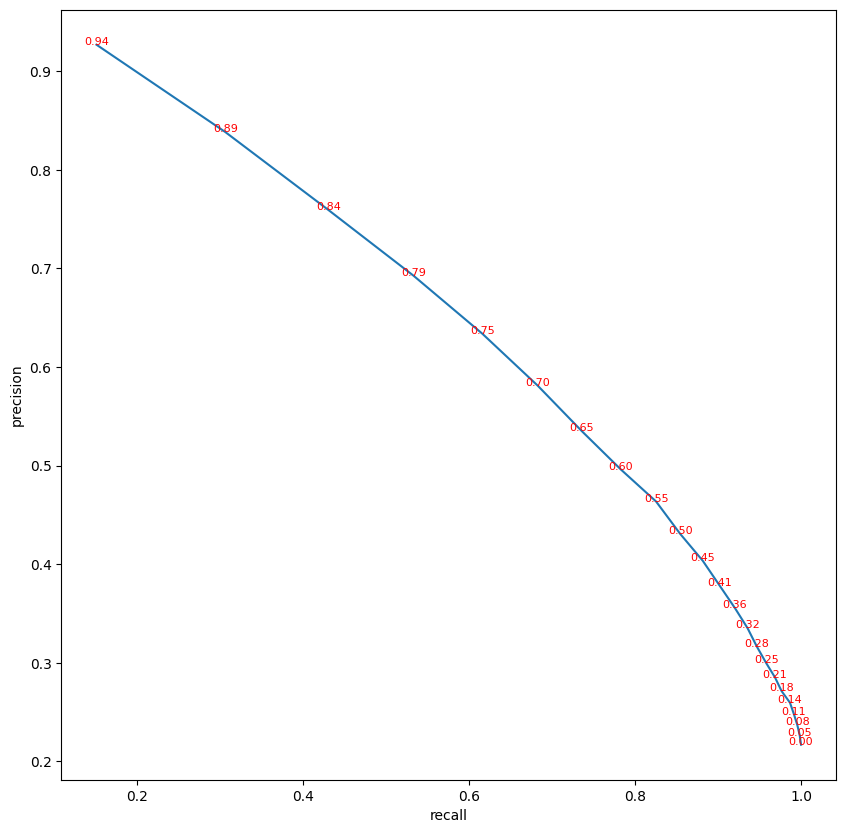

In [83]:
df_train_pr_re_sub.shape

plt.clf()
plt.figure(figsize=(10,10))
sns.lineplot(data=df_train_pr_re_sub, y='precision', x = 'recall')
plt.xlabel('recall')
plt.ylabel('precision')

for i in range(0, df_train_pr_re_sub.shape[0] ):
    plt.text(df_train_pr_re_sub['recall'][i], df_train_pr_re_sub['precision'][i], f"{df_train_pr_re_sub['threshold'][i]:.2f}",
             fontsize=8, color="red", ha="center")

Text(0, 0.5, 'f1')

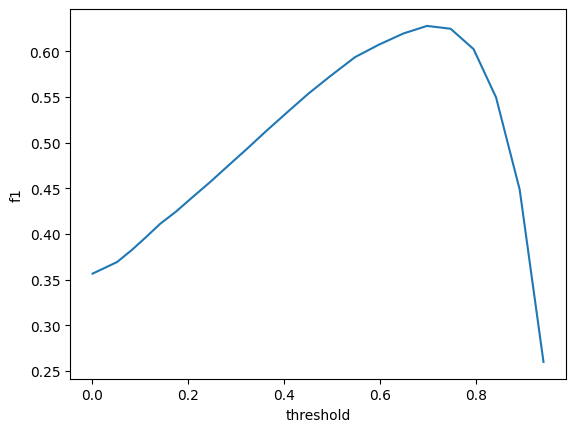

In [86]:
df_train_pr_re_sub.shape

plt.clf()
# plt.figure(figsize=(10,10))
sns.lineplot(data=df_train_pr_re_sub, y='f1', x = 'threshold')
plt.xlabel('threshold')
plt.ylabel('f1')



In [ ]:
df_train_pr_re_sub[df_train_pr_re_sub['threshold']>.6] ##.627 Max f1 & both recision & recall perfect balance

,precision,recall,threshold,f1
16,0.534822,0.735948,0.647810,0.619469
17,0.581295,0.682370,0.697031,0.627790
18,0.633791,0.615851,0.746190,0.624692
19,0.692591,0.532956,0.793979,0.602377
20,0.759088,0.430651,0.840719,0.549536
21,0.838317,0.306106,0.889924,0.448460
22,0.926799,0.151031,0.939426,0.259736


## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf =RandomForestClassifier()
rf.fit(X_train_treat, y_train)

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [206]:
print("****RANDOM FOREST: Basic Version|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,rf.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,rf.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,rf.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,rf.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,rf.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,rf.predict(X_train_treat)) *100,2)}")

****RANDOM FOREST: Basic Version|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17860
           1       1.00      1.00      1.00      4946

    accuracy                           1.00     22806
   macro avg       1.00      1.00      1.00     22806
weighted avg       1.00      1.00      1.00     22806

****EVALUATION SCORES****
Accuracy Score: 100.0
Precision: 100.0
Recall/Positivity: 99.98
F1 Score: 99.99
ROC-AUC: 99.99


In [212]:
print("****RANDOM FOREST: Basic Version|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,rf.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,rf.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,rf.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,rf.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,rf.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_val,rf.predict(X_treat_V)) *100,2)}")

****RANDOM FOREST: Basic Version|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3815
           1       0.95      0.71      0.81      1072

    accuracy                           0.93      4887
   macro avg       0.94      0.85      0.89      4887
weighted avg       0.93      0.93      0.92      4887

****EVALUATION SCORES****
Accuracy Score: 92.88
Precision: 95.14
Recall/Positivity: 71.18
F1 Score: 81.43
ROC-AUC: 85.08


In [ ]:
##Tuning
param_grid_rf ={
    'criterion' : ['gini', 'entropy', 'log_loss'],
     'max_depth' : [5,15,25,30],
     'min_samples_leaf': [1,5,9],
     'max_features':['sqrt', 'log2', None],
     'class_weight': ['balanced', 'balanced_subsample',{0:1,1:5}],
     'min_samples_split':[5,2,20],
     'random_state':[42]
}

In [129]:
rf_tune_mo =RandomizedSearchCV(RandomForestClassifier(),param_grid_rf,cv=5,scoring= 'f1')
rf_tune_mo.fit(X_train_treat,y_train)

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365:

,estimator,RandomForestClassifier()
,param_distributions,"{'class_weight': ['balanced', 'balanced_subsample', ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': [5, 15, ...], 'max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,10
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [208]:
print("****RANDOM FOREST: Tuned Version 1|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,rf_tune_mo.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,rf_tune_mo.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,rf_tune_mo.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,rf_tune_mo.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,rf_tune_mo.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,rf_tune_mo.predict(X_train_treat)) *100,2)}")

****RANDOM FOREST: Tuned Version 1|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17860
           1       0.97      0.88      0.92      4946

    accuracy                           0.97     22806
   macro avg       0.97      0.94      0.95     22806
weighted avg       0.97      0.97      0.97     22806

****EVALUATION SCORES****
Accuracy Score: 96.83
Precision: 96.68
Recall/Positivity: 88.39
F1 Score: 92.35
ROC-AUC: 93.78


In [209]:
print("****RANDOM FOREST: Version 1|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,rf_tune_mo.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,rf_tune_mo.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,rf_tune_mo.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,rf_tune_mo.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,rf_tune_mo.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_val,rf_tune_mo.predict(X_treat_V)) *100,2)}")

****RANDOM FOREST: Version 1|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3815
           1       0.93      0.73      0.82      1072

    accuracy                           0.93      4887
   macro avg       0.93      0.86      0.89      4887
weighted avg       0.93      0.93      0.93      4887

****EVALUATION SCORES****
Accuracy Score: 92.98
Precision: 93.24
Recall/Positivity: 73.32
F1 Score: 82.09
ROC-AUC: 85.91


In [134]:
##Tuning
# param_grid_rf ={
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#      'max_depth' : [5,10,15],
#      'class_weight': ['balanced', 'balanced_subsample',{0:1,1:5}],
#      'min_samples_split':[5,2,20],
#      'random_state':[42]
# }

##Tuning
param_grid_rf1 ={
    'criterion' : ['gini', 'entropy', 'log_loss'],
     'max_depth' : [5,15,10,25],
     'min_samples_leaf': [1,5,9],
    #  'max_features':['sqrt', 'log2', None],
     'class_weight': ['balanced_subsample',{0:1,1:5}],
     'min_samples_split':[5,10,20],
     'min_impurity_decrease':[0.01,1,.005,10],
     'random_state':[42]
}

In [135]:
rf_tune_mo1 =RandomizedSearchCV(RandomForestClassifier(),param_grid_rf1,cv=5,scoring= 'f1')
rf_tune_mo1.fit(X_train_treat,y_train)

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365:

,estimator,RandomForestClassifier()
,param_distributions,"{'class_weight': ['balanced_subsample', {0: 1, 1: 5}], 'criterion': ['gini', 'entropy', ...], 'max_depth': [5, 15, ...], 'min_impurity_decrease': [0.01, 1, ...], ...}"
,n_iter,10
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [221]:
print("****RANDOM FOREST: Version 2|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,rf_tune_mo1.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,rf_tune_mo1.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,rf_tune_mo1.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,rf_tune_mo1.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,rf_tune_mo1.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,rf_tune_mo1.predict(X_train_treat)) *100,2)}")

****RANDOM FOREST: Version 2|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     17860
           1       0.62      0.76      0.68      4946

    accuracy                           0.84     22806
   macro avg       0.77      0.81      0.79     22806
weighted avg       0.86      0.84      0.85     22806

****EVALUATION SCORES****
Accuracy Score: 84.49
Precision: 61.6
Recall/Positivity: 75.66
F1 Score: 67.91
ROC-AUC: 81.3


In [211]:
print("****RANDOM FOREST: Version 2|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,rf_tune_mo1.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,rf_tune_mo1.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,rf_tune_mo1.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,rf_tune_mo1.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,rf_tune_mo1.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_val,rf_tune_mo1.predict(X_treat_V)) *100,2)}")

****RANDOM FOREST: Version 2|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3815
           1       0.62      0.76      0.68      1072

    accuracy                           0.84      4887
   macro avg       0.77      0.81      0.79      4887
weighted avg       0.86      0.84      0.85      4887

****EVALUATION SCORES****
Accuracy Score: 84.37
Precision: 61.63
Recall/Positivity: 76.12
F1 Score: 68.11
ROC-AUC: 81.4


In [137]:
#Tuning
param_grid_rf2 ={
    'criterion' : ['gini', 'entropy', 'log_loss'],
     'max_depth' : [5,10,15],
     'class_weight': ['balanced', 'balanced_subsample',{0:1,1:5}],
     'min_samples_split':[5,2,20],
     'random_state':[42]
}

rf_tune_mo2 =RandomizedSearchCV(RandomForestClassifier(),param_grid_rf2,cv=5,scoring= 'f1')
rf_tune_mo2.fit(X_train_treat,y_train)

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\sklearn\base.py:1365:

,estimator,RandomForestClassifier()
,param_distributions,"{'class_weight': ['balanced', 'balanced_subsample', ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': [5, 10, ...], 'min_samples_split': [5, 2, ...], ...}"
,n_iter,10
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [222]:
print("****RANDOM FOREST: Version 3|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,rf_tune_mo2.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,rf_tune_mo2.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,rf_tune_mo2.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,rf_tune_mo2.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,rf_tune_mo2.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,rf_tune_mo2.predict(X_train_treat)) *100,2)}")

****RANDOM FOREST: Version 3|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17860
           1       0.98      0.87      0.92      4946

    accuracy                           0.97     22806
   macro avg       0.97      0.93      0.95     22806
weighted avg       0.97      0.97      0.97     22806

****EVALUATION SCORES****
Accuracy Score: 96.82
Precision: 97.65
Recall/Positivity: 87.44
F1 Score: 92.27
ROC-AUC: 93.43


In [213]:
print("****RANDOM FOREST: Version 3|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,rf_tune_mo2.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,rf_tune_mo2.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,rf_tune_mo2.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,rf_tune_mo2.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,rf_tune_mo2.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_val,rf_tune_mo2.predict(X_treat_V)) *100,2)}")

****RANDOM FOREST: Version 3|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3815
           1       0.87      0.75      0.80      1072

    accuracy                           0.92      4887
   macro avg       0.90      0.86      0.88      4887
weighted avg       0.92      0.92      0.92      4887

****EVALUATION SCORES****
Accuracy Score: 92.06
Precision: 87.42
Recall/Positivity: 74.53
F1 Score: 80.46
ROC-AUC: 85.76


## XG Boost

In [139]:
from xgboost import XGBClassifier

In [140]:
xg = XGBClassifier()
xg.fit(X_train_treat,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [220]:
print("****XGBoost: Basic Version|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,xg.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,xg.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,xg.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,xg.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,xg.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,xg.predict(X_train_treat)) *100,2)}")

****XGBoost: Basic Version|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17860
           1       1.00      0.86      0.93      4946

    accuracy                           0.97     22806
   macro avg       0.98      0.93      0.95     22806
weighted avg       0.97      0.97      0.97     22806

****EVALUATION SCORES****
Accuracy Score: 96.98
Precision: 99.81
Recall/Positivity: 86.25
F1 Score: 92.54
ROC-AUC: 93.1


In [214]:
print("****XGBoost: Basic Version|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,xg.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,xg.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,xg.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,xg.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,xg.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_val,xg.predict(X_treat_V)) *100,2)}")

****XGBoost: Basic Version|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3815
           1       0.95      0.74      0.84      1072

    accuracy                           0.94      4887
   macro avg       0.94      0.87      0.90      4887
weighted avg       0.94      0.94      0.93      4887

****EVALUATION SCORES****
Accuracy Score: 93.6
Precision: 95.45
Recall/Positivity: 74.35
F1 Score: 83.59
ROC-AUC: 86.68


In [143]:
model_xg = XGBClassifier(
    n_estimators=100,    # number of trees
    learning_rate=0.1,   # step size
    max_depth=3,         # tree depth
    use_label_encoder=False, 
    eval_metric='logloss', # required for classification
    random_state=42
)

# Fit the model
model_xg.fit(X_train_treat,y_train)

c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:00:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [219]:
print("****XGBoost: Version 1|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,model_xg.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,model_xg.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,model_xg.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,model_xg.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,model_xg.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,model_xg.predict(X_train_treat)) *100,2)}")

****XGBoost: Version 1|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.99      0.95     17860
           1       0.93      0.71      0.81      4946

    accuracy                           0.93     22806
   macro avg       0.93      0.85      0.88     22806
weighted avg       0.93      0.93      0.92     22806

****EVALUATION SCORES****
Accuracy Score: 92.7
Precision: 93.48
Recall/Positivity: 71.33
F1 Score: 80.92
ROC-AUC: 84.98


In [215]:
print("****XGBoost: Version 1|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,model_xg.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,model_xg.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,model_xg.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,model_xg.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,model_xg.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_val,model_xg.predict(X_treat_V)) *100,2)}")

****XGBoost: Version 1|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3815
           1       0.93      0.72      0.81      1072

    accuracy                           0.93      4887
   macro avg       0.93      0.85      0.88      4887
weighted avg       0.93      0.93      0.92      4887

****EVALUATION SCORES****
Accuracy Score: 92.55
Precision: 92.65
Recall/Positivity: 71.74
F1 Score: 80.86
ROC-AUC: 85.07


In [151]:
xgb = XGBClassifier(
    eval_metric='logloss',  # avoids warning for classification
    use_label_encoder=False,
    random_state=42
)

# Define parameter grid
param_grid_xg = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Grid search
grid_search = GridSearchCV(
    xgb,
    param_grid_xg,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [152]:
grid_search.fit(X_train_treat,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\rachi\OneDrive\Desktop\Python Learning\onyx_sept\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:18:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, ...], 'min_child_weight': [1, 3, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [ ]:
print("****XGBoost: Version 2|| TRAINING DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_train,grid_search.predict(X_train_treat)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train,grid_search.predict(X_train_treat)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_train,grid_search.predict(X_train_treat)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_train,grid_search.predict(X_train_treat)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_train,grid_search.predict(X_train_treat)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_train,grid_search.predict(X_train_treat)) *100,2)}")

****XGBoost: Version 2|| TRAINING DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17860
           1       0.99      0.75      0.85      4946

    accuracy                           0.94     22806
   macro avg       0.96      0.87      0.91     22806
weighted avg       0.95      0.94      0.94     22806

****EVALUATION SCORES****
Accuracy Score: 94.41
Precision: 98.7
Recall/Positivity: 75.23
F1 Score: 85.38
ROC-AUC: 87.48


In [ ]:
print("****XGBoost: Version 2|| VALIDATION DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_val,grid_search.predict(X_treat_V)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_val,grid_search.predict(X_treat_V)) *100,2)}")

print(f"Precision: {round(metrics.precision_score(y_val,grid_search.predict(X_treat_V)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_val,grid_search.predict(X_treat_V)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_val,grid_search.predict(X_treat_V)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_val,grid_search.predict(X_treat_V)) *100,2)}")
##Best Model

****XGBoost: Version 2|| VALIDATION DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3815
           1       0.96      0.73      0.83      1072

    accuracy                           0.94      4887
   macro avg       0.95      0.86      0.90      4887
weighted avg       0.94      0.94      0.93      4887

****EVALUATION SCORES****
Accuracy Score: 93.57
Precision: 96.45
Recall/Positivity: 73.41
F1 Score: 83.37
ROC-AUC: 86.33


## Test Validation

In [156]:
##Validation Data Adjustment
##Data Processing

##Categorical variable without any order
person_home_ownership_T = pd.get_dummies(X_test['person_home_ownership'], drop_first=True, dtype=int)

##loan intent variable without any order
loan_intent_T = pd.get_dummies(X_test['loan_intent'], drop_first=True, dtype=int)

##in EDA Can see grade Increases the default chances
loan_grade_T = pd.DataFrame(ln_gr.transform(X_test[['loan_grade']]).ravel(), columns=['loan_grade'])

##cb_person_default_on_file
cb_person_default_on_file_T = pd.get_dummies(X_test['cb_person_default_on_file'], drop_first=True, dtype=int)

##gender
gender_T = pd.get_dummies(X_test['gender'], drop_first=True, dtype=int)

##marital_status
marital_status_T = pd.get_dummies(X_test['marital_status'], drop_first=True, dtype=int)

##educational_level
education_level_T = pd.DataFrame(edn_level.transform(X_test[['education_level']]).ravel(), columns=['education_level'])

###Location variable, although as per EDA, it seems there aren't important	
country_T = pd.get_dummies(X_test['country'], drop_first=True, dtype=int)
state_T = pd.get_dummies(X_test['state'], drop_first=True, dtype=int)
city_T = pd.get_dummies(X_test['city'], drop_first=True, dtype=int)

##loan_term_months
loan_term_T = pd.DataFrame(ln_term_mnth.transform(X_test[['loan_term_months']]).ravel(), columns=['loan_term_months'])

##past_delinquencies
past_delinquencies_T = pd.get_dummies(X_test['past_delinquencies'], drop_first=True, dtype=int)
past_delinquencies_T.columns = ["past_delinquencies_"+str(i) for i in past_delinquencies_T.columns]

X_cat_T = pd.concat([person_home_ownership_T,loan_intent_T, loan_grade_T,cb_person_default_on_file_T,gender_T,marital_status_T,education_level_T,country_T,state_T,city_T,loan_term_T,past_delinquencies_T],axis = 1)
X_cat_T.head()

,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4,past_delinquencies_5
0,0,0,0,0,1,0,0,0,2.0,0,1,1,0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0.0,0,1,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1,0,0,0,0
2,0,0,1,0,0,0,1,0,0.0,0,0,0,1,0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,2.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0.0,0,1,0,0,1,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0


In [160]:
X_cat_T['past_delinquencies_6'] = 0

In [161]:
X_cat_T.head()

,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4,past_delinquencies_5,past_delinquencies_6
0,0,0,0,0,1,0,0,0,2.0,0,1,1,0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0.0,0,1,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0.0,0,0,0,1,0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,2.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0.0,0,1,0,0,1,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0


In [162]:

age_t_T = person_age_T.transform(X_test[['person_age']]) #.ravel()


inc_t_T = person_income_T.transform(X_test[['person_income']]) #.ravel()

##as it has zeros so box-cox can't use
emp_length_t_T = person_emp_length_T.transform(X_test[['person_emp_length']]) #.ravel()

loan_amt_t_T = loan_amnt_T.transform(X_test[['loan_amnt']]) #.ravel()

loan_int_t_T = loan_int_rate_T.transform(X_test[['loan_int_rate']]) #.ravel()

##as it has zeros so box-cox can't use
loan_income_t_T =loan_percent_income_T.transform(X_test[['loan_percent_income']]) #.ravel()

cred_history_t_T = cred_history_T.transform(X_test[['cb_person_cred_hist_length']]) #.ravel()

##Ratio
loan_to_income_ratio_t_T = loan_to_income_ratio_T.transform(X_test[['loan_to_income_ratio']]) #.ravel()

other_debt_t_T = other_debt_T.transform(X_test[['other_debt']]) #.ravel()

##############################
##Ratio
debt_to_income_ratio_t_T = debt_to_income_ratio_T.transform(X_test[['debt_to_income_ratio']]) #.ravel()

open_accounts_t_T = open_accounts_T.transform(X_test[['open_accounts']]) #.ravel()

##Ratio
credit_utilization_ratio_t_T = credit_utilization_ratio_T.transform(X_test[['credit_utilization_ratio']]) #.ravel()

merged_T = np.hstack([age_t_T,inc_t_T,emp_length_t_T,loan_amt_t_T,loan_int_t_T, loan_income_t_T, cred_history_t_T,loan_to_income_ratio_t_T,other_debt_t_T,debt_to_income_ratio_t_T,open_accounts_t_T,credit_utilization_ratio_t_T])
# merged.head()
X_train_num_T = pd.DataFrame(merged_T, columns= ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_to_income_ratio','other_debt','debt_to_income_ratio','open_accounts','credit_utilization_ratio'])
X_train_num_T.head()

X_treat_T = pd.concat([X_train_num_T,X_cat_T ], axis = 1)
X_treat_T.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4,past_delinquencies_5,past_delinquencies_6
0,0.586137,-0.170556,1.398153,-0.943015,0.004377,-0.906544,0.178131,-0.908837,-0.879517,-1.501844,-0.169279,-0.381541,0,0,0,0,1,0,0,0,2.0,0,1,1,0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,0,0,0
1,-0.286529,0.859485,0.536056,-0.422235,-1.018893,-1.060372,-0.185409,-1.115479,0.308251,-1.302918,-0.901022,-1.023283,0,0,0,0,0,0,1,0,0.0,0,1,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1,0,0,0,0,0
2,1.619648,-0.867409,-0.236646,-0.662725,-0.750319,0.000141,1.673840,-0.035348,-0.164257,0.352622,0.277941,-0.793596,0,0,1,0,0,0,1,0,0.0,0,0,0,1,0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0,0
3,1.128410,-0.432703,0.536056,0.506891,-0.967817,0.984481,0.685489,1.000249,0.060648,1.041513,0.277941,1.282710,0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,2.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0
4,0.407155,-0.763058,0.057661,-0.943015,-1.331526,-0.484047,0.874080,-0.471850,0.169820,0.444346,1.500031,1.072199,0,0,0,0,0,1,0,0,0.0,0,1,0,0,1,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0


In [224]:
print("****LOGISTIC REGRESSION: Basic Version|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,logistic_mod.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,logistic_mod.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,logistic_mod.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,logistic_mod.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,logistic_mod.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,logistic_mod.predict(X_treat_T)) *100,2)}")

****LOGISTIC REGRESSION: Basic Version|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3798
           1       0.53      0.80      0.64      1090

    accuracy                           0.80      4888
   macro avg       0.73      0.80      0.75      4888
weighted avg       0.84      0.80      0.81      4888

****EVALUATION SCORES****
Accuracy Score: 79.87
Precision: 53.26
Recall/Positivity: 79.54
F1 Score: 63.8
ROC-AUC: 79.75


In [226]:
print("****LOGISTIC REGRESSION: Version 1|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,lg_grid.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,lg_grid.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,lg_grid.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,lg_grid.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,lg_grid.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,lg_grid.predict(X_treat_T)) *100,2)}")

****LOGISTIC REGRESSION: Version 1|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3798
           1       0.53      0.80      0.64      1090

    accuracy                           0.80      4888
   macro avg       0.73      0.80      0.75      4888
weighted avg       0.84      0.80      0.81      4888

****EVALUATION SCORES****
Accuracy Score: 79.73
Precision: 53.02
Recall/Positivity: 79.72
F1 Score: 63.69
ROC-AUC: 79.73


In [228]:
print("****LOGISTIC REGRESSION: Version 2|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,lg_grid1.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,lg_grid1.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,lg_grid1.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,lg_grid1.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,lg_grid1.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,lg_grid1.predict(X_treat_T)) *100,2)}")

****LOGISTIC REGRESSION: Version 2|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      3798
           1       0.45      0.86      0.59      1090

    accuracy                           0.73      4888
   macro avg       0.70      0.78      0.69      4888
weighted avg       0.83      0.73      0.75      4888

****EVALUATION SCORES****
Accuracy Score: 73.02
Precision: 44.55
Recall/Positivity: 85.87
F1 Score: 58.66
ROC-AUC: 77.6


In [229]:
print("****RANDOM FOREST: BASIC Version|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,rf.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,rf.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,rf.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,rf.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,rf.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,rf.predict(X_treat_T)) *100,2)}")

****RANDOM FOREST: BASIC Version|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3798
           1       0.94      0.70      0.80      1090

    accuracy                           0.92      4888
   macro avg       0.93      0.84      0.88      4888
weighted avg       0.92      0.92      0.92      4888

****EVALUATION SCORES****
Accuracy Score: 92.27
Precision: 94.06
Recall/Positivity: 69.72
F1 Score: 80.08
ROC-AUC: 84.23


In [230]:
print("****RANDOM FOREST: Version 1|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,rf_tune_mo.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,rf_tune_mo.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,rf_tune_mo.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,rf_tune_mo.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,rf_tune_mo.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,rf_tune_mo.predict(X_treat_T)) *100,2)}")

****RANDOM FOREST: Version 1|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3798
           1       0.93      0.72      0.81      1090

    accuracy                           0.92      4888
   macro avg       0.93      0.85      0.88      4888
weighted avg       0.92      0.92      0.92      4888

****EVALUATION SCORES****
Accuracy Score: 92.45
Precision: 92.97
Recall/Positivity: 71.56
F1 Score: 80.87
ROC-AUC: 85.0


In [231]:
print("****RANDOM FOREST: Version 2|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,rf_tune_mo1.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,rf_tune_mo1.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,rf_tune_mo1.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,rf_tune_mo1.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,rf_tune_mo1.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,rf_tune_mo1.predict(X_treat_T)) *100,2)}")

****RANDOM FOREST: Version 2|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3798
           1       0.63      0.76      0.69      1090

    accuracy                           0.85      4888
   macro avg       0.78      0.82      0.80      4888
weighted avg       0.86      0.85      0.85      4888

****EVALUATION SCORES****
Accuracy Score: 84.78
Precision: 63.11
Recall/Positivity: 76.42
F1 Score: 69.13
ROC-AUC: 81.8


In [232]:
print("****RANDOM FOREST: Version 3|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,rf_tune_mo2.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,rf_tune_mo2.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,rf_tune_mo2.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,rf_tune_mo2.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,rf_tune_mo2.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,rf_tune_mo2.predict(X_treat_T)) *100,2)}")

****RANDOM FOREST: Version 3|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3798
           1       0.87      0.73      0.80      1090

    accuracy                           0.92      4888
   macro avg       0.90      0.85      0.87      4888
weighted avg       0.91      0.92      0.91      4888

****EVALUATION SCORES****
Accuracy Score: 91.59
Precision: 87.02
Recall/Positivity: 73.21
F1 Score: 79.52
ROC-AUC: 85.04


In [233]:
print("****XGBOOST: BASIC Version|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,xg.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,xg.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,xg.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,xg.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,xg.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,xg.predict(X_treat_T)) *100,2)}")

****XGBOOST: BASIC Version|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3798
           1       0.95      0.73      0.83      1090

    accuracy                           0.93      4888
   macro avg       0.94      0.86      0.89      4888
weighted avg       0.93      0.93      0.93      4888

****EVALUATION SCORES****
Accuracy Score: 93.15
Precision: 95.1
Recall/Positivity: 73.03
F1 Score: 82.62
ROC-AUC: 85.97


In [234]:
print("****XGBOOST: Version 1|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,model_xg.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,model_xg.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,model_xg.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,model_xg.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,model_xg.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,model_xg.predict(X_treat_T)) *100,2)}")

****XGBOOST: Version 1|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3798
           1       0.92      0.70      0.79      1090

    accuracy                           0.92      4888
   macro avg       0.92      0.84      0.87      4888
weighted avg       0.92      0.92      0.92      4888

****EVALUATION SCORES****
Accuracy Score: 91.96
Precision: 92.45
Recall/Positivity: 69.63
F1 Score: 79.43
ROC-AUC: 84.0


In [236]:
print("****BEST VERSION****")

print("****XGBOOST: Version 2|| TEST DATA****")

print("****CLASSIFICATION REPORT****")
print(metrics.classification_report(y_test,grid_search.predict(X_treat_T)) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,grid_search.predict(X_treat_T))*100,2)}")

print(f"Precision: {round(metrics.precision_score(y_test,grid_search.predict(X_treat_T)) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(y_test,grid_search.predict(X_treat_T)) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,grid_search.predict(X_treat_T)) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(y_test,grid_search.predict(X_treat_T)) *100,2)}")

****BEST VERSION****
****XGBOOST: Version 2|| TEST DATA****
****CLASSIFICATION REPORT****
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3798
           1       0.97      0.72      0.82      1090

    accuracy                           0.93      4888
   macro avg       0.95      0.86      0.89      4888
weighted avg       0.93      0.93      0.93      4888

****EVALUATION SCORES****
Accuracy Score: 93.19
Precision: 96.79
Recall/Positivity: 71.83
F1 Score: 82.46
ROC-AUC: 85.58


 98%|===================| 4806/4888 [00:41<00:00]        

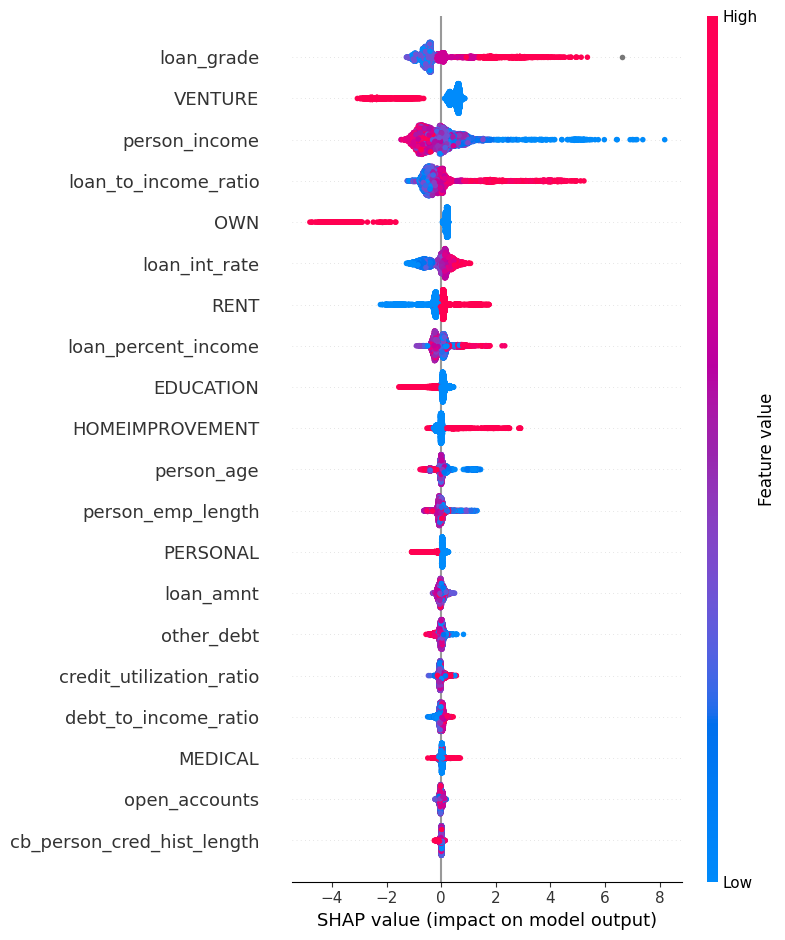

In [179]:
import shap

# For Logistic Regression or Tree models
explainer = shap.Explainer(grid_search.best_estimator_, X_train_treat)
shap_values = explainer(X_treat_V)

# Global importance plot
shap.summary_plot(shap_values, X_treat_V)


##Conclusion
# Loan grade = strongest predictor (bad grade → high risk).

# Loan type: VENTURE loans = especially risky (red = high, far right).

# Income = protective: higher income = safer.

# Loan-to-income ratio = big driver: higher ratios → higher risk.

# Interest rate = higher rate → riskier borrowers.

# Features like open accounts, medical loan intent, credit history length = minor impact.


## Data to Export

In [258]:
##Validation Data Adjustment
##Data Processing

##Categorical variable without any order
person_home_ownership_ = pd.get_dummies(X['person_home_ownership'], drop_first=True, dtype=int)

##loan intent variable without any order
loan_intent_ = pd.get_dummies(X['loan_intent'], drop_first=True, dtype=int)

##in EDA Can see grade Increases the default chances
loan_grade_ = pd.DataFrame(ln_gr.transform(X[['loan_grade']]).ravel(), columns=['loan_grade'])

##cb_person_default_on_file
cb_person_default_on_file_ = pd.get_dummies(X['cb_person_default_on_file'], drop_first=True, dtype=int)

##gender
gender_ = pd.get_dummies(X['gender'], drop_first=True, dtype=int)

##marital_status
marital_status_ = pd.get_dummies(X['marital_status'], drop_first=True, dtype=int)

##educational_level
education_level_ = pd.DataFrame(edn_level.transform(X[['education_level']]).ravel(), columns=['education_level'])

###Location variable, although as per EDA, it seems there aren't important	
country_ = pd.get_dummies(X['country'], drop_first=True, dtype=int)
state_ = pd.get_dummies(X['state'], drop_first=True, dtype=int)
city_ = pd.get_dummies(X['city'], drop_first=True, dtype=int)

##loan_term_months
loan_term_ = pd.DataFrame(ln_term_mnth.transform(X[['loan_term_months']]).ravel(), columns=['loan_term_months'])

##past_delinquencies
past_delinquencies_ = pd.get_dummies(X['past_delinquencies'], drop_first=True, dtype=int)
past_delinquencies_.columns = ["past_delinquencies_"+str(i) for i in past_delinquencies_.columns]

X_cat_ = pd.concat([person_home_ownership_,loan_intent_, loan_grade_,cb_person_default_on_file_,gender_,marital_status_,education_level_,country_,state_,city_,loan_term_,past_delinquencies_],axis = 1)
X_cat_.head()


age_t_ = person_age_T.transform(X[['person_age']]) #.ravel()


inc_t_ = person_income_T.transform(X[['person_income']]) #.ravel()

##as it has zeros so box-cox can't use
emp_length_t_ = person_emp_length_T.transform(X[['person_emp_length']]) #.ravel()

loan_amt_t_ = loan_amnt_T.transform(X[['loan_amnt']]) #.ravel()

loan_int_t_ = loan_int_rate_T.transform(X[['loan_int_rate']]) #.ravel()

##as it has zeros so box-cox can't use
loan_income_t_ =loan_percent_income_T.transform(X[['loan_percent_income']]) #.ravel()

cred_history_t_ = cred_history_T.transform(X[['cb_person_cred_hist_length']]) #.ravel()

##Ratio
loan_to_income_ratio_t_ = loan_to_income_ratio_T.transform(X[['loan_to_income_ratio']]) #.ravel()

other_debt_t_ = other_debt_T.transform(X[['other_debt']]) #.ravel()

##############################
##Ratio
debt_to_income_ratio_t_ = debt_to_income_ratio_T.transform(X[['debt_to_income_ratio']]) #.ravel()

open_accounts_t_ = open_accounts_T.transform(X[['open_accounts']]) #.ravel()

##Ratio
credit_utilization_ratio_t_ = credit_utilization_ratio_T.transform(X[['credit_utilization_ratio']]) #.ravel()

merged_ = np.hstack([age_t_,inc_t_,emp_length_t_,loan_amt_t_,loan_int_t_, loan_income_t_, cred_history_t_,loan_to_income_ratio_t_,other_debt_t_,debt_to_income_ratio_t_,open_accounts_t_,credit_utilization_ratio_t_])
# merged.head()
X_train_num_ = pd.DataFrame(merged_, columns= ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_to_income_ratio','other_debt','debt_to_income_ratio','open_accounts','credit_utilization_ratio'])
X_train_num_.head()

X_treat_ = pd.concat([X_train_num_,X_cat_ ], axis = 1)
X_treat_.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_grade,Y,Male,Married,Single,Widowed,education_level,UK,USA,California,England,New York,Ontario,Quebec,Scotland,Texas,Wales,Cardiff,Dallas,Edinburgh,Glasgow,Houston,London,Los Angeles,Manchester,Montreal,New York City,Ottawa,Quebec City,San Francisco,Swansea,Toronto,Vancouver,Victoria,loan_term_months,past_delinquencies_1,past_delinquencies_2,past_delinquencies_3,past_delinquencies_4,past_delinquencies_5,past_delinquencies_6
0,-1.334984,0.123360,6.971696,2.541872,1.476867,2.370202,-0.688539,2.371037,-0.066299,2.416258,1.306021,0.003554,0,0,1,0,0,0,1,0,3.0,1,1,1,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0,0,0,0
1,-1.804505,-3.274870,0.311529,-2.383436,0.115537,-0.618723,-1.469381,-0.564266,-2.226509,-0.509950,0.492645,0.346311,0,1,0,1,0,0,0,0,1.0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1,0,0,0
2,-0.286529,-3.274870,-1.046344,-0.538327,0.626612,2.322316,-0.688539,2.323029,-1.534045,2.924024,1.306021,0.964913,0,0,0,0,0,1,0,0,2.0,0,0,1,0,0,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,0,0,0
3,-0.933115,0.307378,0.057661,2.541872,1.271998,2.217189,-1.469381,2.223119,-0.281697,1.984763,1.500031,-0.447033,0,0,1,0,0,1,0,0,2.0,0,1,1,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0
4,-0.586810,-0.020403,0.922570,2.541872,1.015866,2.271390,-0.185409,2.477763,0.776867,3.176595,-0.901022,-1.047152,0,0,1,0,0,1,0,0,2.0,1,0,0,1,0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0


In [283]:
df_proba = pd.DataFrame(data= {'loan_status_predicted': grid_search.predict(X_treat_).ravel().tolist(),
                    'probability_of default': grid_search.predict_proba(X_treat_)[:,1].ravel().tolist(),
                    
                    })

In [285]:
df1_f = pd.concat([df1,df_proba], axis=1)
df1_f.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies,loan_status_predicted,probability_of default
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0,1,0.995411
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3,0,0.034039
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0,1,0.996017
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0,1,0.988845
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0,1,0.996532


In [282]:

print(metrics.classification_report(df_proba['loan_status'],df_proba['loan_status_predicted']) )

print("****EVALUATION SCORES****")
print(f"Accuracy Score: {round(metrics.accuracy_score(df_proba['loan_status'],df_proba['loan_status_predicted'])*100,2)}")

print(f"Precision: {round(metrics.precision_score(df_proba['loan_status'],df_proba['loan_status_predicted']) *100,2)}")
print(f"Recall/Positivity: {round(metrics.recall_score(df_proba['loan_status'],df_proba['loan_status_predicted']) *100,2)}")
print(f"F1 Score: {round(metrics.f1_score(df_proba['loan_status'],df_proba['loan_status_predicted']) *100,2)}")
print(f"ROC-AUC: {round(metrics.roc_auc_score(df_proba['loan_status'],df_proba['loan_status_predicted']) *100,2)}")

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     25473
           1       0.98      0.74      0.85      7108

    accuracy                           0.94     32581
   macro avg       0.96      0.87      0.90     32581
weighted avg       0.94      0.94      0.94     32581

****EVALUATION SCORES****
Accuracy Score: 94.1
Precision: 98.07
Recall/Positivity: 74.44
F1 Score: 84.64
ROC-AUC: 87.01


In [ ]:
# Train set
X_train_dummies = pd.get_dummies(X_train, columns=categorical_cols)

# Save the full column list
all_cols = X_train_dummies.columns

# Validation/Test set
X_val_dummies = pd.get_dummies(X_val, columns=categorical_cols)

# Align columns with training
X_val_dummies = X_val_dummies.reindex(columns=all_cols, fill_value=0)
